<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [ ]:
import pandas as pd
df= pd.read_csv('data/datos_clientes.csv')
df.set_index('Id_Cliente', inplace=True)
df.describe().T





,count,mean,std,min,25%,50%,75%,max
Edad,200.0,38.8500,13.969007,18.00,28.7500,36.00,49.000,70.00
Ingreso,200.0,60624.4466,26262.903416,13458.02,41512.7875,60777.96,77143.865,138584.52
Puntaje_Gasto,200.0,50.2000,25.823522,1.00,34.7500,50.00,73.000,99.00


## Análisis

- Se leen los datops desde el folder datos y se reindexa el dataframe para que el Id del Cliente se configure como Index.

- En las estadísticas descriptivas se observa un total de 200 observaciones con una edad entre el rango de 18 a 70 años, un ingreso promedio de US$60624 y  una desviación standart de 26262.903. El puntaje de gasto promedio es de  50.2 con una std de 25.82. 

- Claramente la escala de las magnitudes entre los features son diferentes y esto afectará el cálculo de las distancias más adelante.


### 2. Análisis descriptivo de los datos. 

Antes de comenzar el análisis de segmentación haga un análisis descriptivo de los datos, para ello puede hacer uso de estadísticas descriptivas y/o histogramas y/o correlogramas. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadisticamente significativas.

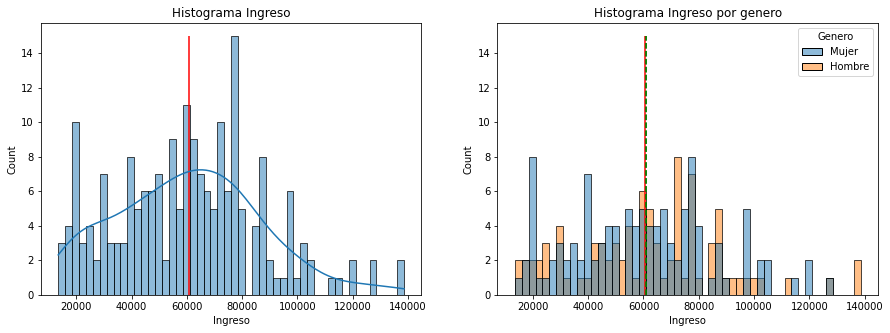

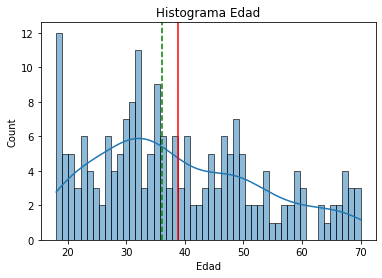

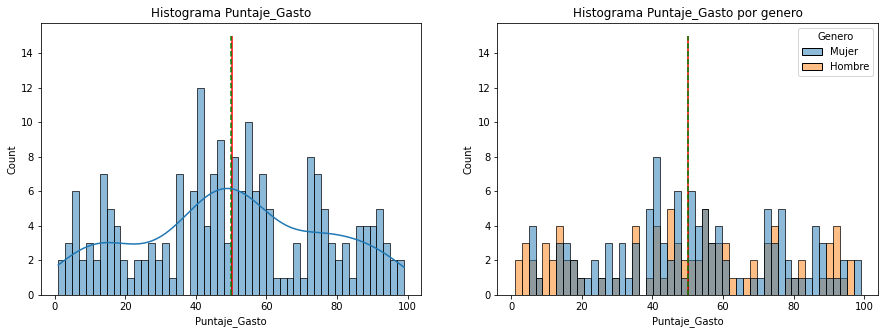

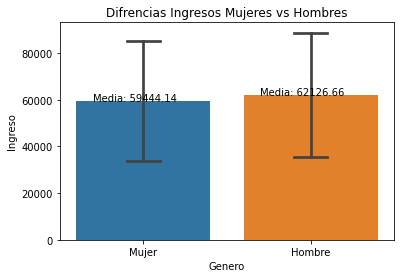

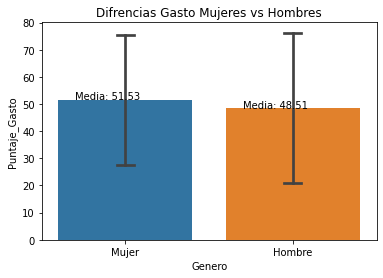

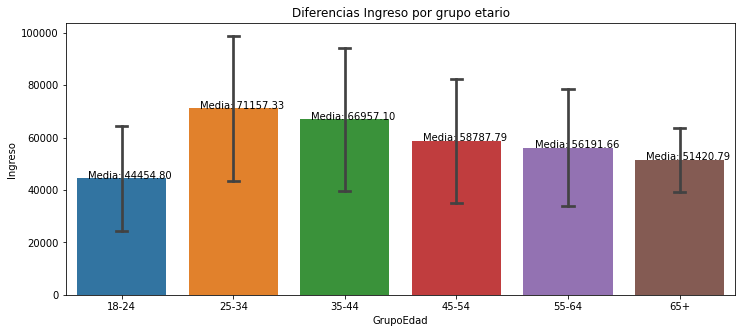

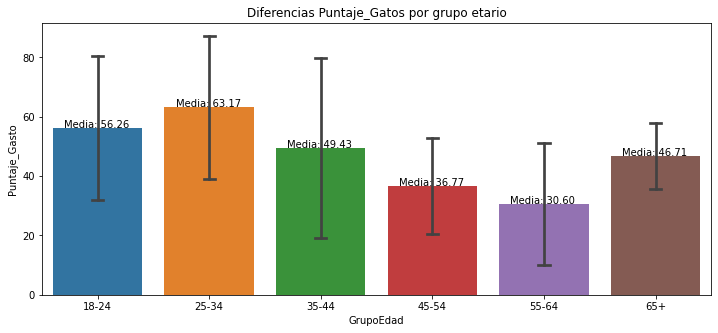

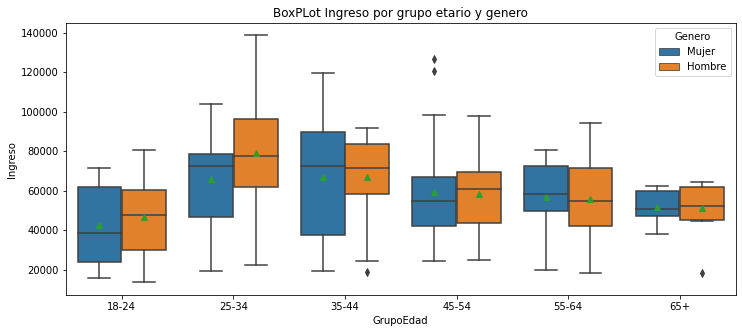

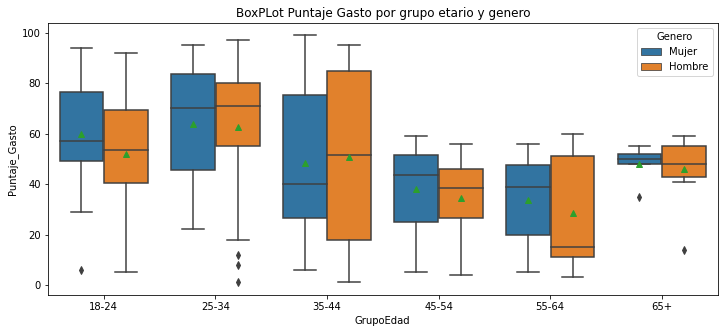

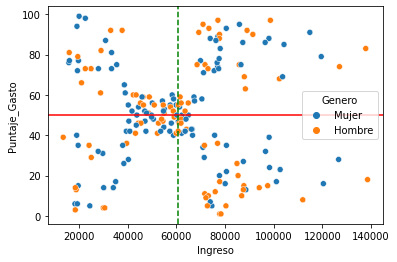

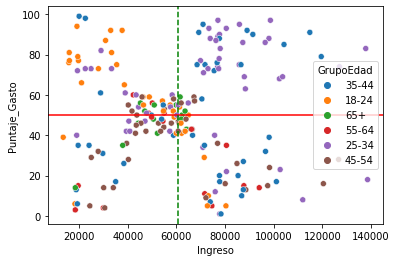

<Figure size 864x576 with 0 Axes>

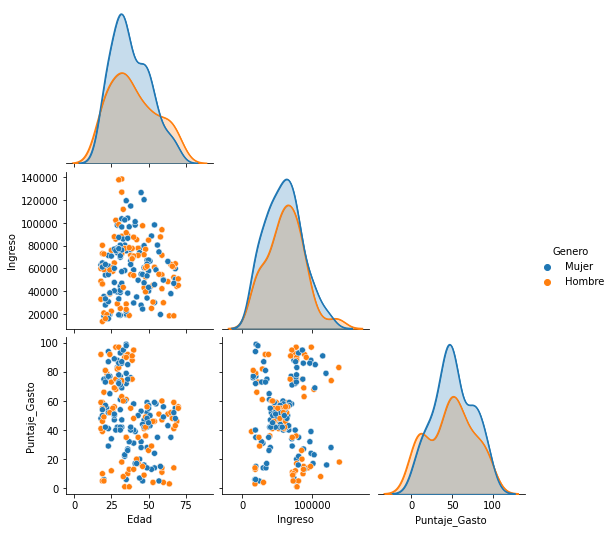

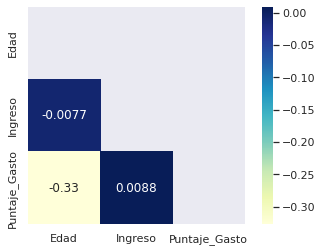

In [ ]:
import seaborn as sb
import matplotlib.pyplot  as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# HISTOGRAMAS

# Histogramas Ingreso  e Ingreso por genero
fig, axes = plt.subplots(1, 2,figsize=(15,5))
sb.histplot(data = df, x= 'Ingreso', bins=50,kde = True, ax=axes[0])
axes[0].set_title('Histograma Ingreso')
axes[0].vlines(x=df.Ingreso.mean(), ymin=0, ymax=15, color='red')
axes[1].vlines(x=df.Ingreso.median(), ymin=0, ymax=15, color='green',ls='--')
sb.histplot(data = df, x= 'Ingreso', bins=50, hue='Genero',ax=axes[1])
axes[1].vlines(x=df.Ingreso.mean(), ymin=0, ymax=15, color='red')
axes[1].vlines(x=df.Ingreso.median(), ymin=0, ymax=15, color='green',ls='--')
axes[1].set_title('Histograma Ingreso por genero')
plt.show()

# Histograma Edad
plt.title('Histograma Edad')
sb.histplot(data = df, x= 'Edad', bins=50,kde = True)
plt.axvline(x=df.Edad.mean(),  color='red')
plt.axvline(x=df.Edad.median(), color='green',ls='--')
plt.show()

# Histogramas Gasto y Gasto por genero
fig, axes = plt.subplots(1, 2,figsize=(15,5))
sb.histplot(data = df, x= 'Puntaje_Gasto', bins=50, kde = True,ax=axes[0])
axes[0].vlines(x=df.Puntaje_Gasto.mean(), ymin=0, ymax=15, color='red')
axes[0].vlines(x=df.Puntaje_Gasto.median(), ymin=0, ymax=15, color='green',ls='--')
axes[0].set_title('Histograma Puntaje_Gasto')
sb.histplot(data = df, x= 'Puntaje_Gasto', bins=50,  hue='Genero', ax=axes[1])
axes[1].vlines(x=df.Puntaje_Gasto.mean(), ymin=0, ymax=15, color='red')
axes[1].vlines(x=df.Puntaje_Gasto.median(), ymin=0, ymax=15, color='green',ls='--')
axes[1].set_title('Histograma Puntaje_Gasto por genero')
plt.show()

# Bar Plots para mostrar las diferencias por genero
fig, ax = plt.subplots()
plt.title("Difrencias Ingresos Mujeres vs Hombres")
sb.barplot(data = df, x = 'Genero', y='Ingreso', estimator= np.mean, ci='sd',capsize=0.2, ax=ax)
for p in ax.patches:
        ax.annotate('Media: {:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))
plt.show()

fig, ax = plt.subplots()
plt.title("Difrencias Gasto Mujeres vs Hombres")
sb.barplot(data = df, x = 'Genero', y='Puntaje_Gasto', estimator= np.mean, ci='sd',capsize=0.1, ax=ax)
for p in ax.patches:
        ax.annotate('Media: {:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))
plt.show()


#Crear una nueva Columna por rango de edades
df['GrupoEdad']=pd.cut(df['Edad'],bins=(17,24,34,44,55, 64,np.inf), 
                           labels=['18-24','25-34','35-44','45-54','55-64', '65+'])

# Bar Plots para mostrar las diferencias Ingreso por grupo etario
df['GrupoEdad']= df['GrupoEdad'].astype(object)
fig, ax = plt.subplots(figsize=(12,5))
plt.title("Diferencias Ingreso por grupo etario")
sb.barplot(data = df, x = 'GrupoEdad', y = 'Ingreso', ci = 'sd', capsize=0.1,
                      ax = ax,  order = ['18-24','25-34','35-44','45-54','55-64', '65+']);
for p in ax.patches:
        ax.annotate('Media: {:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))
plt.show()

# Bar Plots para mostrar las diferencias Gastos por grupo etario
fig, ax = plt.subplots(figsize=(12,5))
plt.title("Diferencias Puntaje_Gatos por grupo etario")
sb.barplot(data = df, x = 'GrupoEdad', y = 'Puntaje_Gasto', ci = 'sd', capsize=0.1,
                      ax = ax,  order = ['18-24','25-34','35-44','45-54','55-64', '65+']);
for p in ax.patches:
        ax.annotate('Media: {:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))
plt.show()


#BOXPLOT   Ingreso por grupo etario y genero 
fig, ax = plt.subplots(figsize=(12,5))
plt.title("BoxPLot Ingreso por grupo etario y genero")
sb.boxplot(data = df, x = 'GrupoEdad', y = 'Ingreso', hue='Genero', ax = ax,  showmeans=True,order = ['18-24','25-34','35-44','45-54','55-64', '65+']);
plt.show()

#BOXPLOT  Score Gasto por grupo etario y genero 
fig, ax = plt.subplots(figsize=(12,5))
plt.title("BoxPLot Puntaje Gasto por grupo etario y genero")
sb.boxplot(data = df, x = 'GrupoEdad', y = 'Puntaje_Gasto', hue='Genero', ax = ax,  showmeans=True,order = ['18-24','25-34','35-44','45-54','55-64', '65+']);
plt.show()


# Relacion entra Ingreso-PuntajerGastos por genero
sb.scatterplot(data=df, x='Ingreso', y="Puntaje_Gasto",hue='Genero')
plt.axhline(y=df.Puntaje_Gasto.mean(),
            color='red')
plt.axvline(x=df.Ingreso.median(),
            color='green',ls='--')
plt.show()

# Relacion entra Ingreso-PuntajerGastos por Grupo Etareo
sb.scatterplot(data=df, x='Ingreso', y="Puntaje_Gasto",hue='GrupoEdad')
plt.axhline(y=df.Puntaje_Gasto.mean(),
            color='red')
plt.axvline(x=df.Ingreso.median(),
            color='green',ls='--')
plt.show()


## Relacion por pares
plt.figure(figsize=(12,8))
g = sb.pairplot(df,  corner=True, hue='Genero')
g.map_lower(sb.scatterplot)
g.map_diag(sb.kdeplot)
plt.show()

# Matriz de Correlacion
sb.set(font_scale=1)
mask = np.triu(np.ones_like(df.corr()))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True,square = True,mask= mask)
plt.show()




## Análisis
- Del histograma de Ingresos, la distribución es Skewed a la derecha y se debe a la presencia de algunos datos de ingresos atípicos que  están un rango muy superior al resto de la población. Por otro lado, el histograma de Ingresos por género indica género no podría ser una feature que pueda ayudarnos a separar los clusters.

- En promedio el Ingreso del hombre es mayor. En promedio, el score del gasto es mayor en mujeres.

- Por grupo etario, el Ingreso y score de Gasto en promedio es mayor en el rango de edades de 25-34. El grupo etario con menor promedio de ingreso es de 18-24 y el grupo con el score de gastos  menor en promedio es de 55-64.

- A priori, en los diagramas de dispersion entre Ingreso ver Gasto, puedo inferir un numero de clusters = 5 con la siguiente interpretación


| Cluster        | 
| ----------- |
| Ingreso Bajo con bajo nivel de gasto    |
| Ingreso Bajo con alto nivel de gasto      |
| Ingreso estandar       |  
| Ingreso Alto con bajo nivel de gasto        |
| Ingreso Alto con alto nivel de gasto        |

- Por otro lado, en la matriz de correlación  se observa una correlación casi cero(positiva) entre puntaje score_gatos e ingreso.  Una correlación casi cero  entre ingreso y edad (negativa) y una correlación baja negativa entre edad y score de gasto. 
- Los rangos atipicos de mayor ingreso estan localizados en el grupo etario 45-54 y son mujeres (Boxplot de ingresos  por grupo etario y género).

### 3. Clustering Jerárquico

### 3.1. Dendogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, construya y grafique un dendograma. Para la construcción del dendograma utilice el enlace 'ward' y la distancia euclidiana.

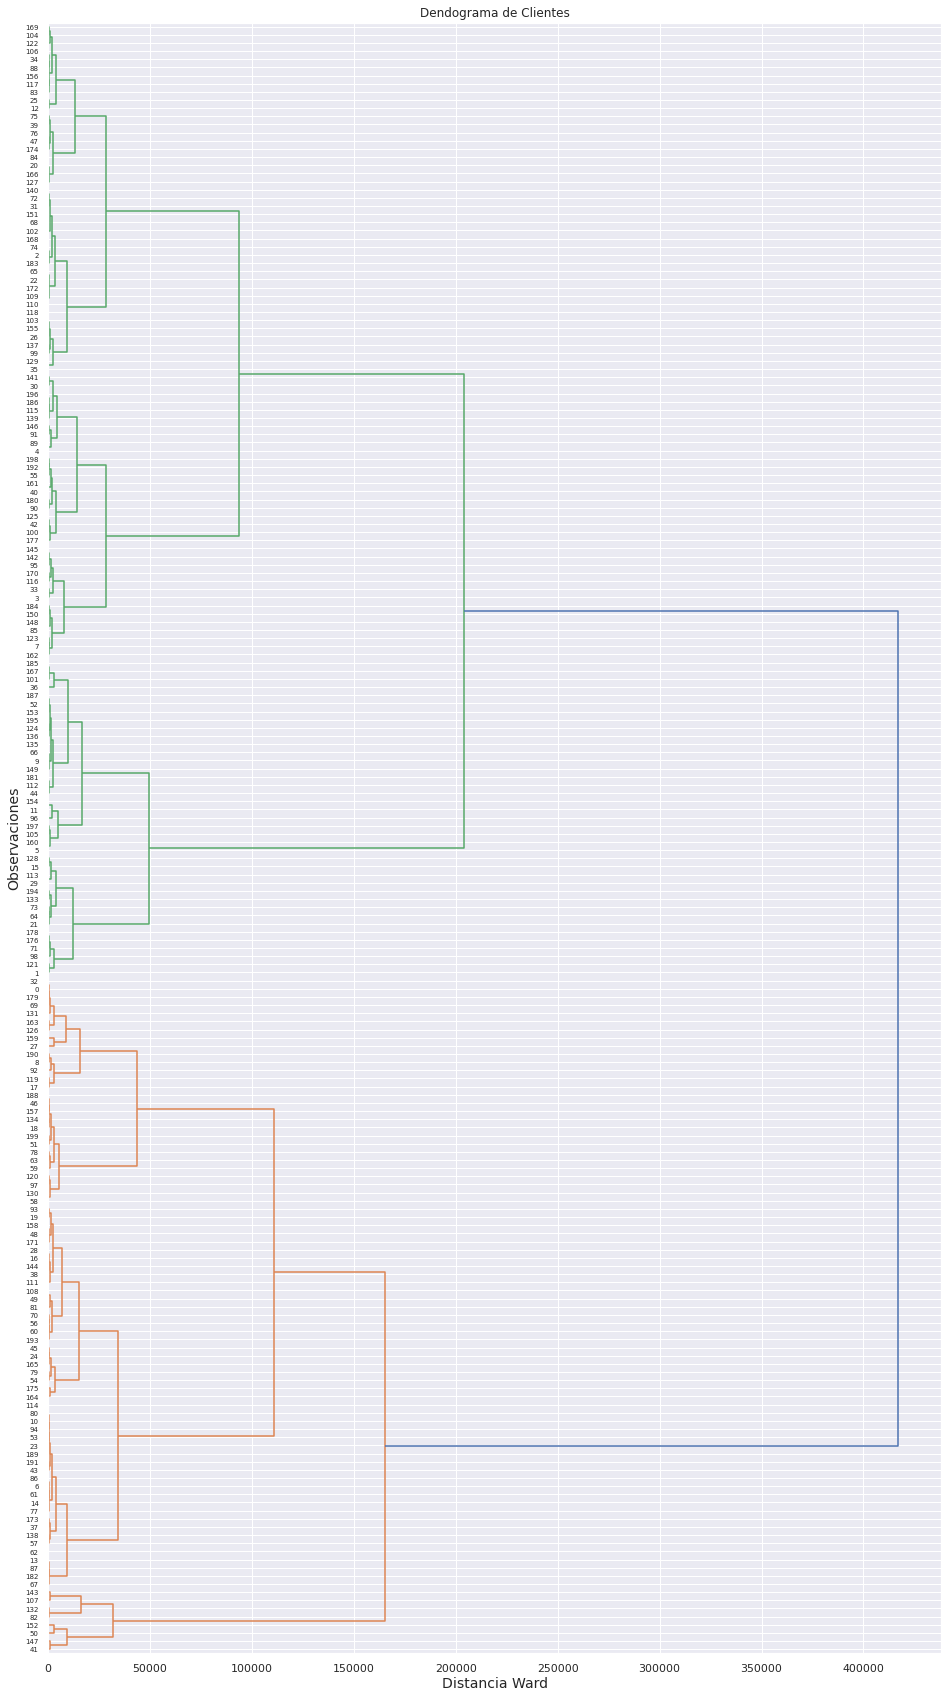

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

dist = pdist(df[['Ingreso', 'Puntaje_Gasto']], metric='euclidean')
Z = linkage(dist, method='ward')

# Plot dendograma de clientes
fig, ax = plt.subplots(figsize=(16, 30))
plt.title("Dendograma de Clientes")
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=7, orientation='right',ax=ax)
ax.set_ylabel('Observaciones', fontsize=14) 
ax.set_xlabel('Distancia Ward', fontsize=14)
plt.show()



## Análisis

- Se obtiene la matriz de distancias con la métrica de distancia euclidiana. Luego con esa matriz de distancias, se ejecuta el algoritmo de clustering aglomerativo usando el metodo ward.  Este metodo de enlace ward minimiza la varianza total dentro de los cluster a fusionar. Se procede a visualizar el dendrograma.

- El dendrograma fue rotado 90 grados para mejorar la visualización de los nodos hoja.

### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 150000.

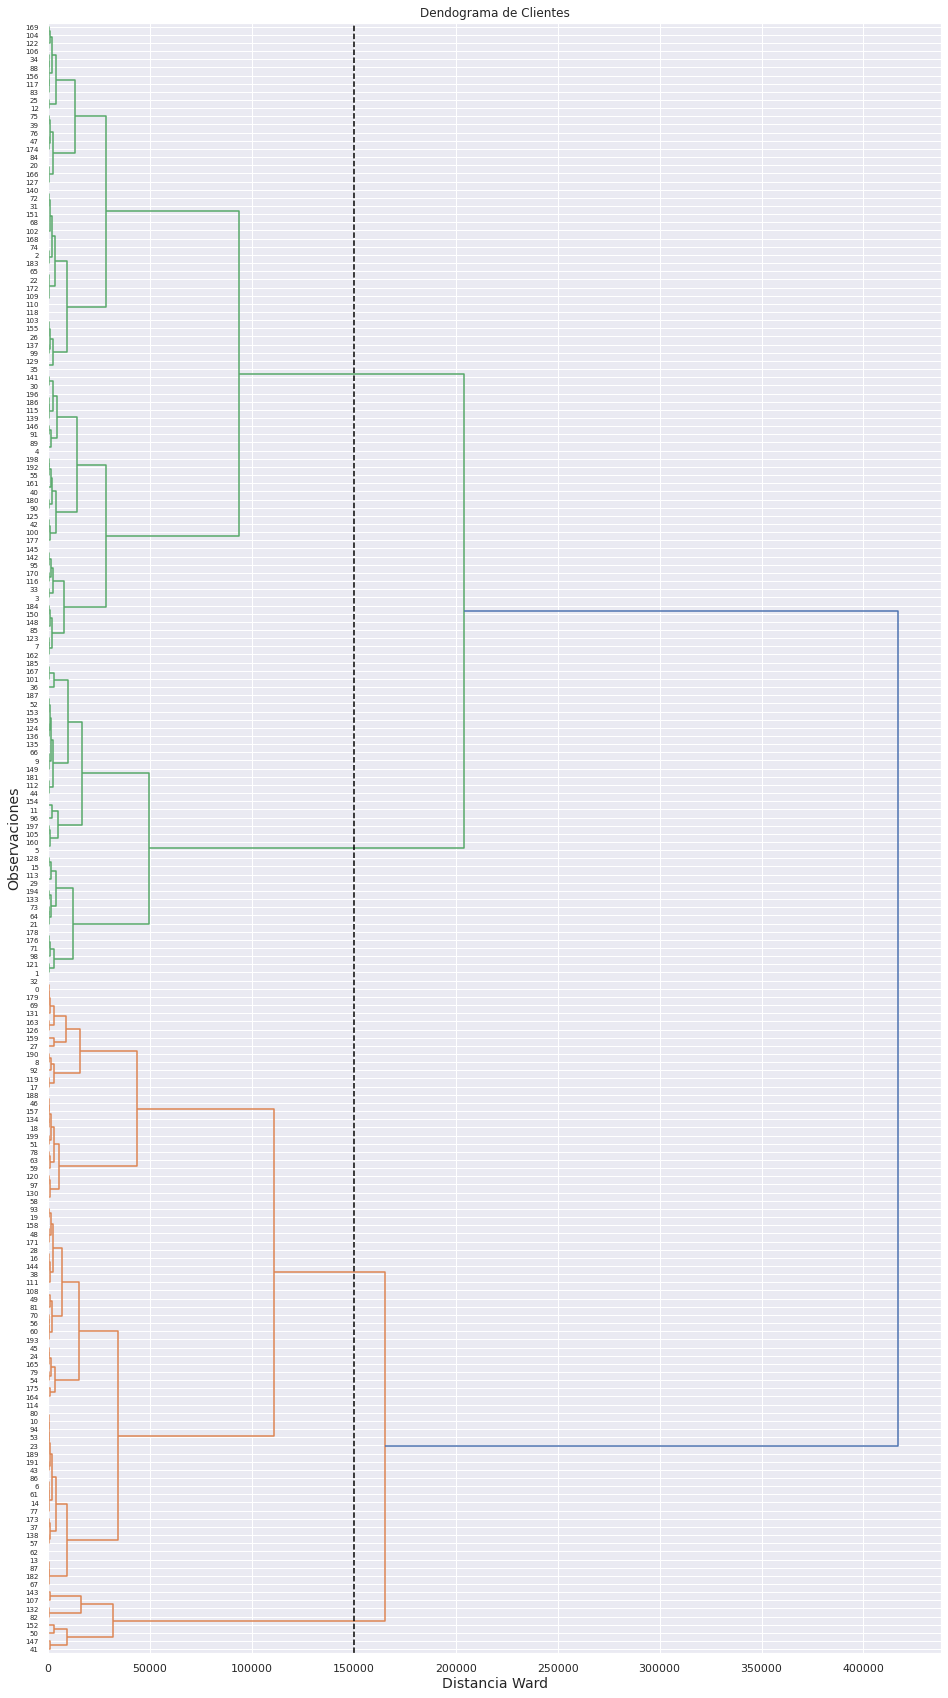

Con una distancia de 150000 se retienen 4 clusters


In [ ]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist

# Plot dendograma de clientes
fig, ax = plt.subplots(figsize=(16, 30))
plt.title("Dendograma de Clientes")
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=7, orientation='right',ax=ax)
ax.set_ylabel('Observaciones', fontsize=14)
ax.set_xlabel('Distancia Ward', fontsize=14)
plt.axvline(x=150000,  color='black',ls='--')
plt.show()


distancia_corte = 150000
clusters= fcluster(Z, t=distancia_corte, criterion='distance')
print(f'Con una distancia de {distancia_corte} se retienen {max(clusters) } clusters')


## Análisis

- Visualmente con el dendrograma , se retienen 4 clusters  a una distancia de 150000. </BR>
Si se cortara el dendrograma más arriba, entonces habría menos clusters  finales, pero su nivel de similitud sería menor. Si se cortara el dendrograma más abajo, entonces el nivel de similitud sería mayor, pero habría más clusteres finales.


- Usando scipy.cluster.hierarchy.fcluster con esta misma distancia se obtiene el mismo número de clusters.


### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo. Explique brevemente en que consiste. En su aplicación escoja un método de enlace y una métrica de distancia, siempre justificando su elección. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

cluster_sk = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
cluster_sk_labels =cluster_sk.fit_predict(df[['Ingreso', 'Puntaje_Gasto']])
df_clusterizado=df[['Ingreso', 'Puntaje_Gasto']]
df_clusterizado['cluster']= cluster_sk_labels




## Análisis
-La métrica de distancia a escoger es euclidiana y el método de enlace es "Completo". La razon es porque en la matrix de correlacion se observo una correlación casi cero , y por lo tanto la distancia euclidiana sigue siendo valida. Metodo de enlace "Completo" para tener clusters bien segregados y compactos.

- Caso contrario si el Ingreso y Score de Gasto hubiesen presentado alguna marcada correlación, la metrica de distancia apropiada hubiese sido "Correlación" parta obtener un buen grado dismilaridad. 

Haga un gráfico de dispersión donde se puedan visualizar los clusters encontrados e interprete los mismos en términos del tipo clientes que representan. ¿Si usted tiene que elegir uno de estos grupos para focalizar su estrategia de marketing, cuál eligiría y por qué?

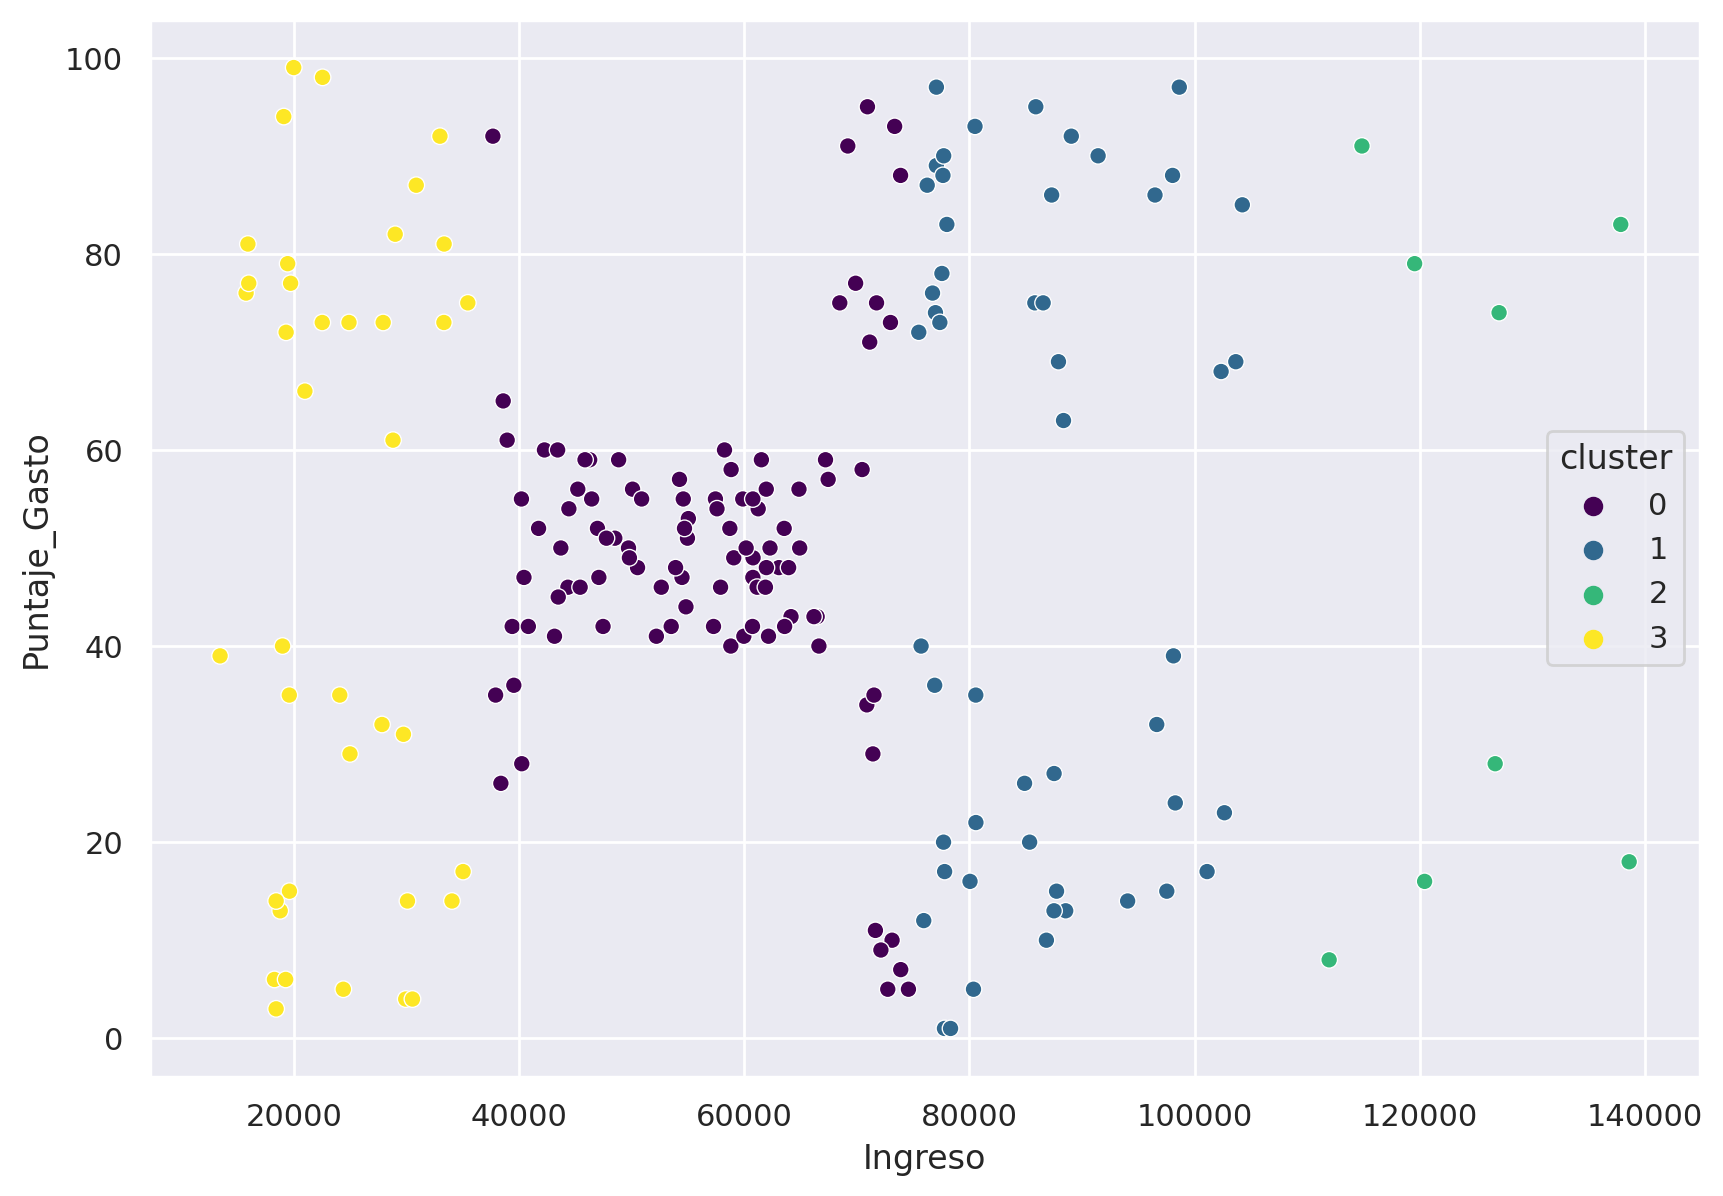

In [ ]:
plt.figure(figsize=(10,7), dpi=200)
sb.scatterplot(data=df_clusterizado, x='Ingreso', y="Puntaje_Gasto",hue='cluster', palette='viridis')
plt.show()

## Analisis

- La interpretacion de estos clusters son:

| Cluster       | Interpretacion | Segmento de Cliente
| ----------- | ----------- |---------- |
| 0      |  Ingreso  Normal    |Estandar    |
| 1   | Ingreso Alto        |***Este podria ser el segmento Target  ***    |
| 2   |Ingreso demasiado alto       |  Oultiers/Atipicos |
| 3   | Ingreso Bajo        |No importante      |

- Algo que noto , es que el cluster fue formado principalmente por el Ingreso y es aqui donde se refleja la debilidad de esta clusterización. Me gustaria tener clusters en donde se tenga en cuenta el score de gastos  tambien.

- La estrategia de marketing realmente depende del producto pero la enfocaria en los ingressos altos porque es una decision  de los individuos si gastan o no (porque tiene el poder adquisitivo) ; y es aqui que la externalidad dada por la actividades de marketing para inclinar ese deseo de compra en favor del producto. 

#### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Antes de implementar DBSCAN explique brevemente en que consiste, los parámetros de los cuáles depende y justifique su elección de `eps`, `min_samples` y `metric`.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


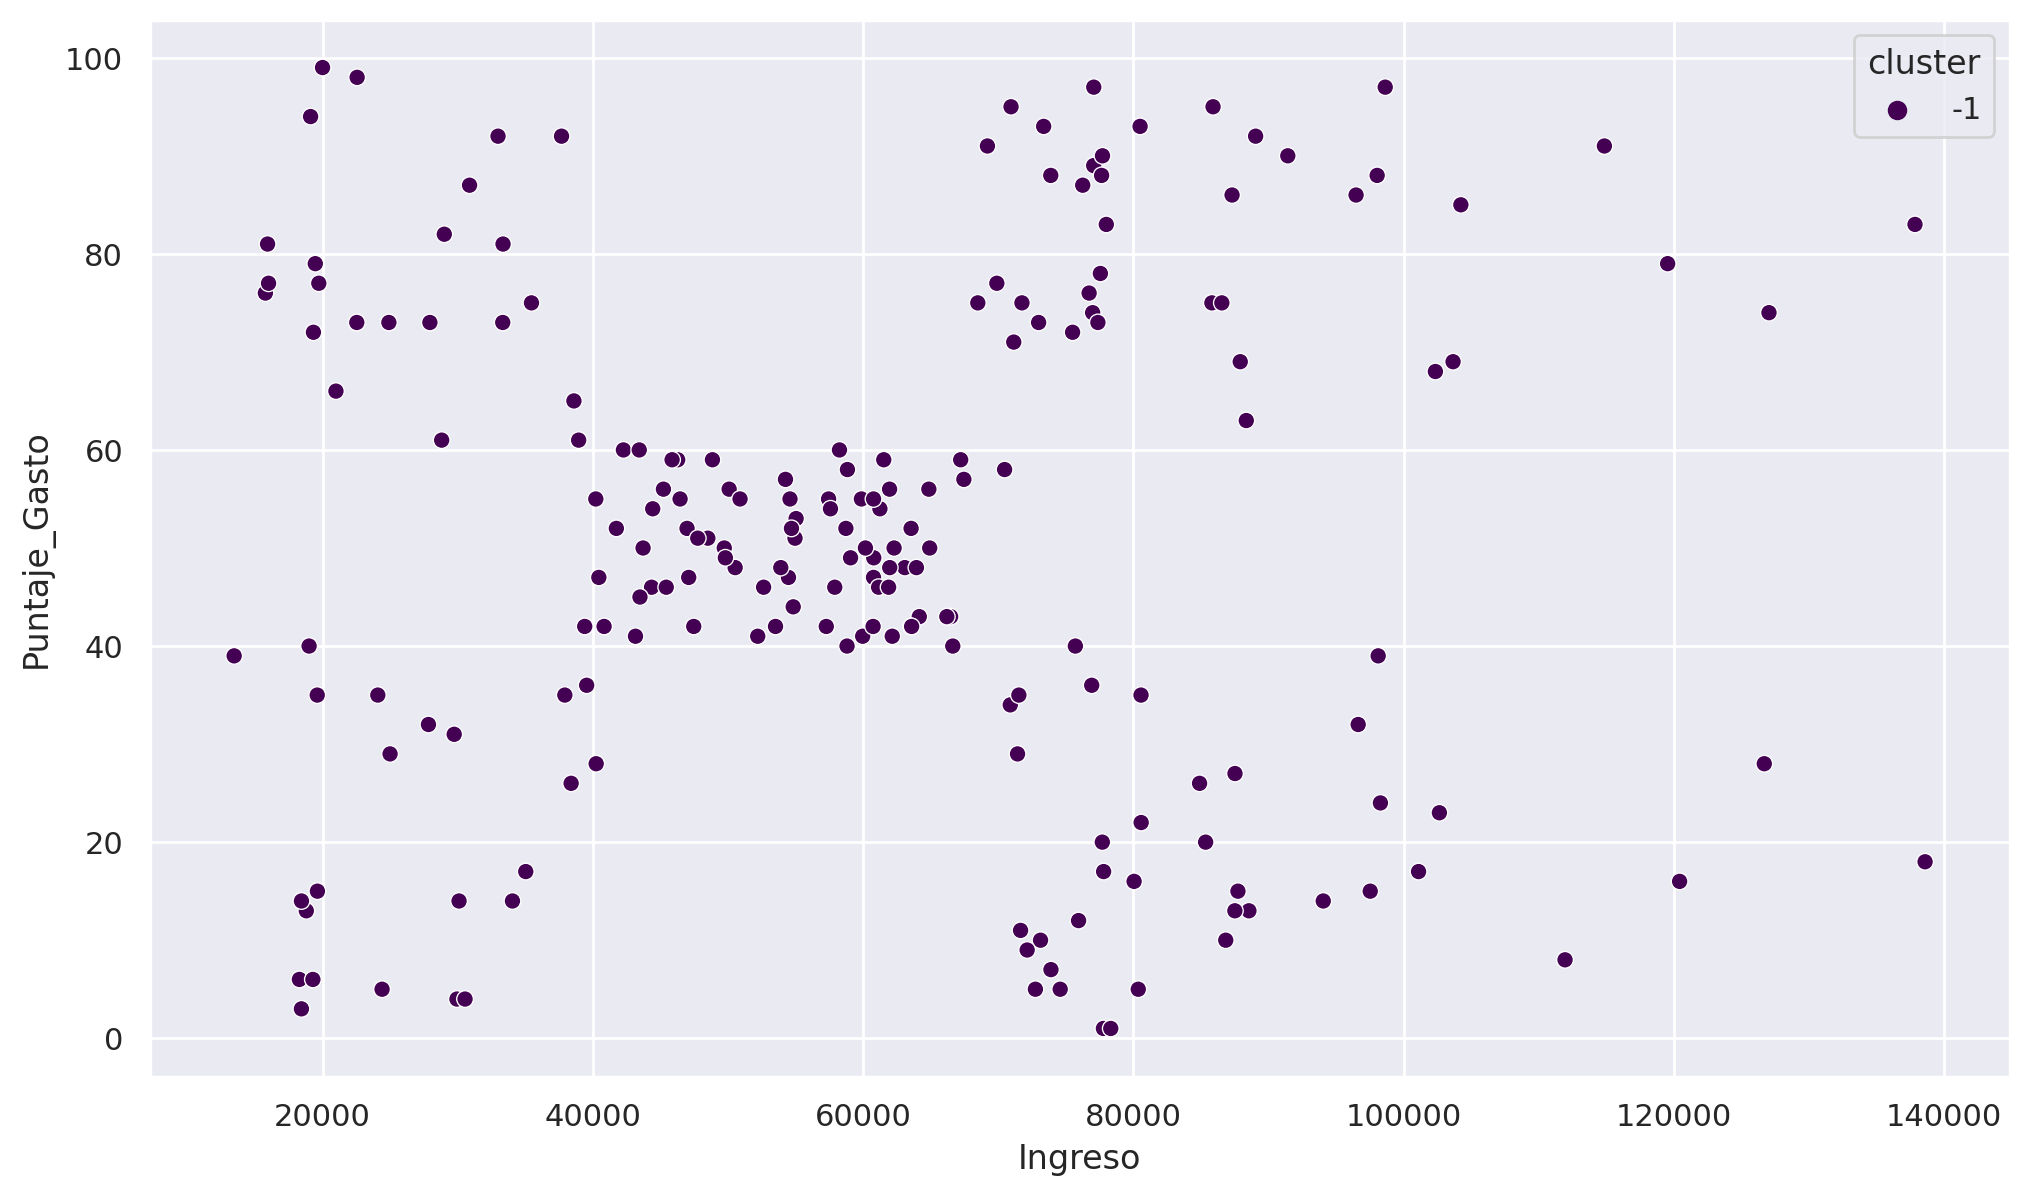

Numero de Outliers=200
Porcentaje Oultiers =100.0%


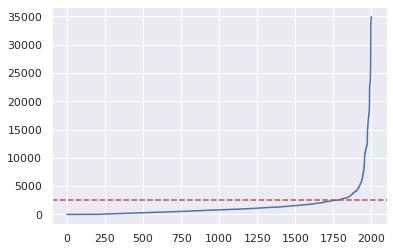

2580.2011685913135


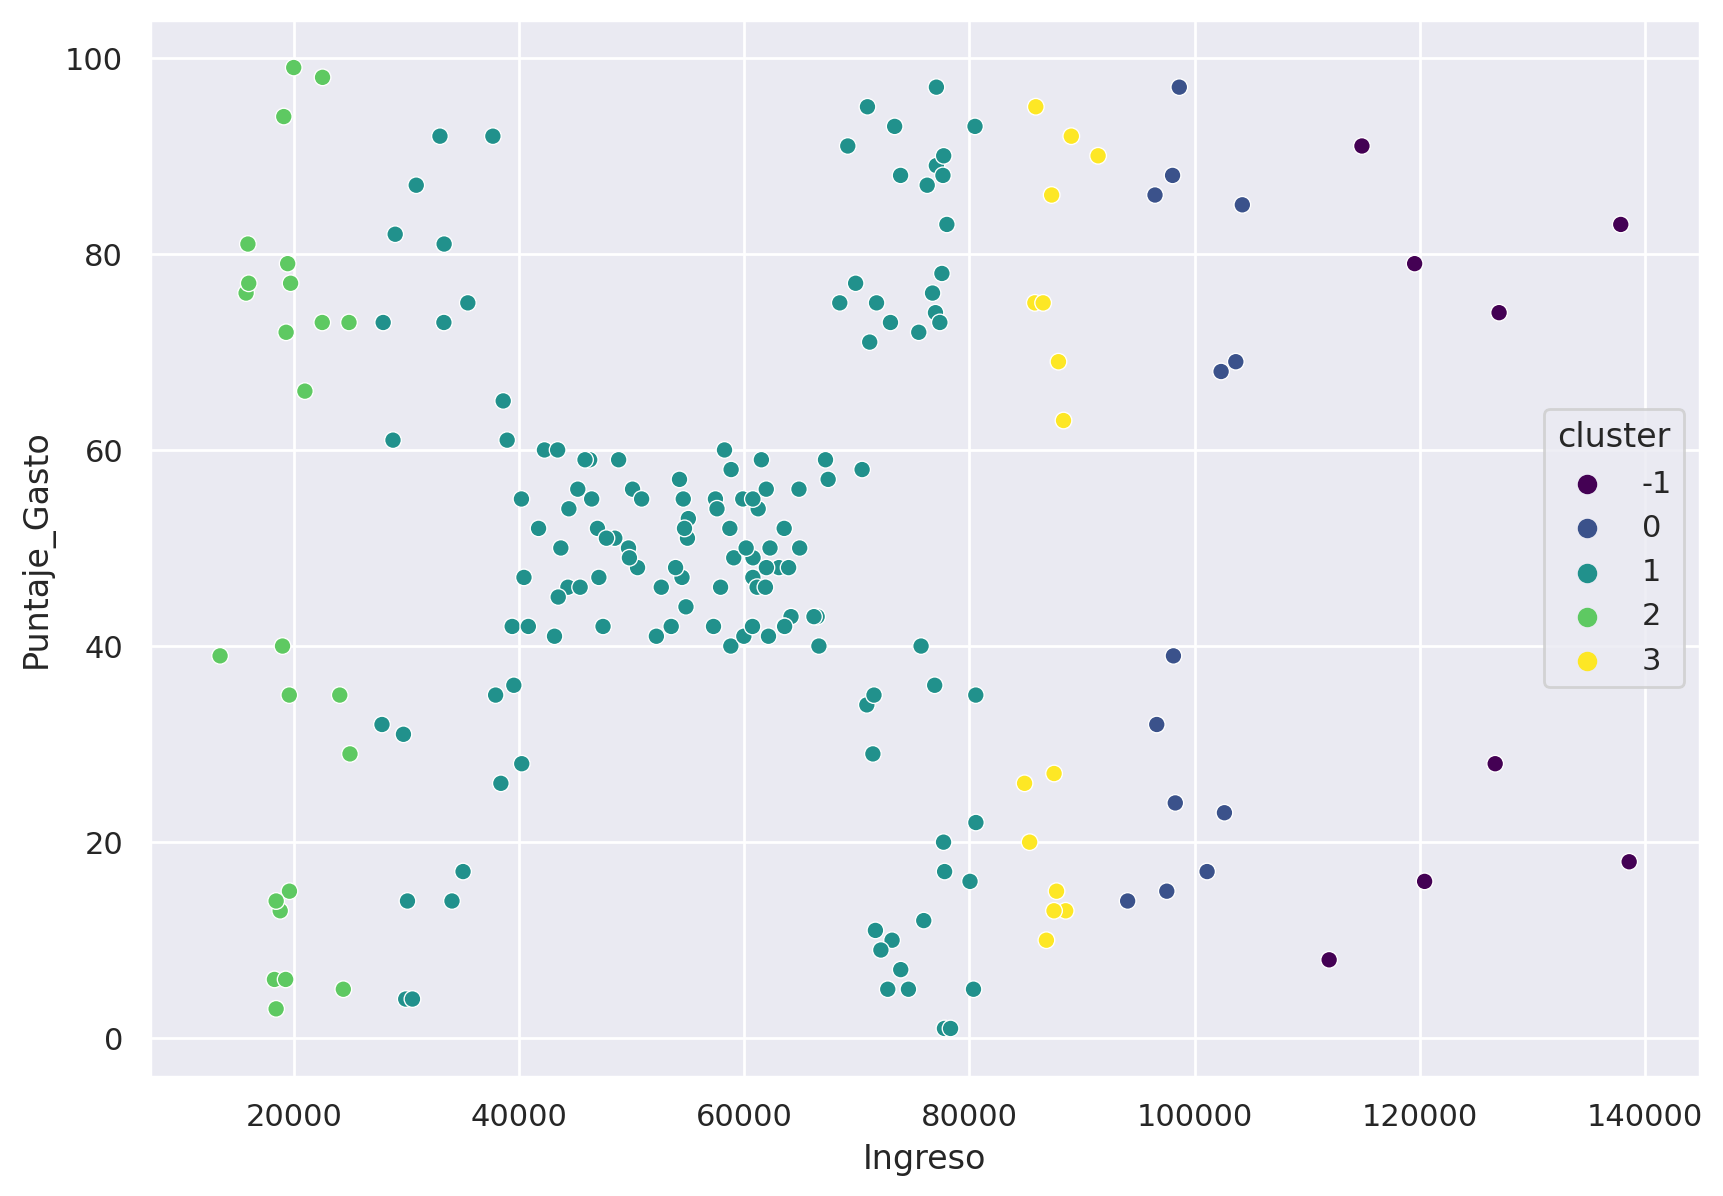

Numero de Outliers=8
Porcentaje Oultiers =4.0%


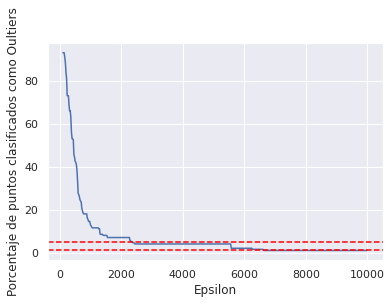

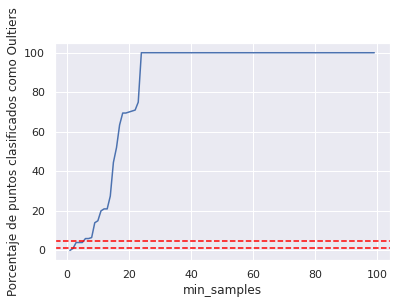

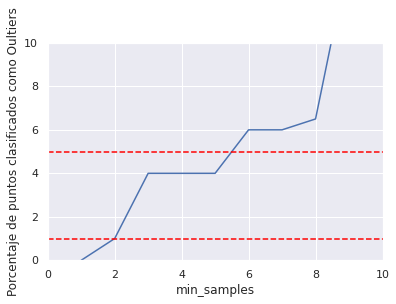

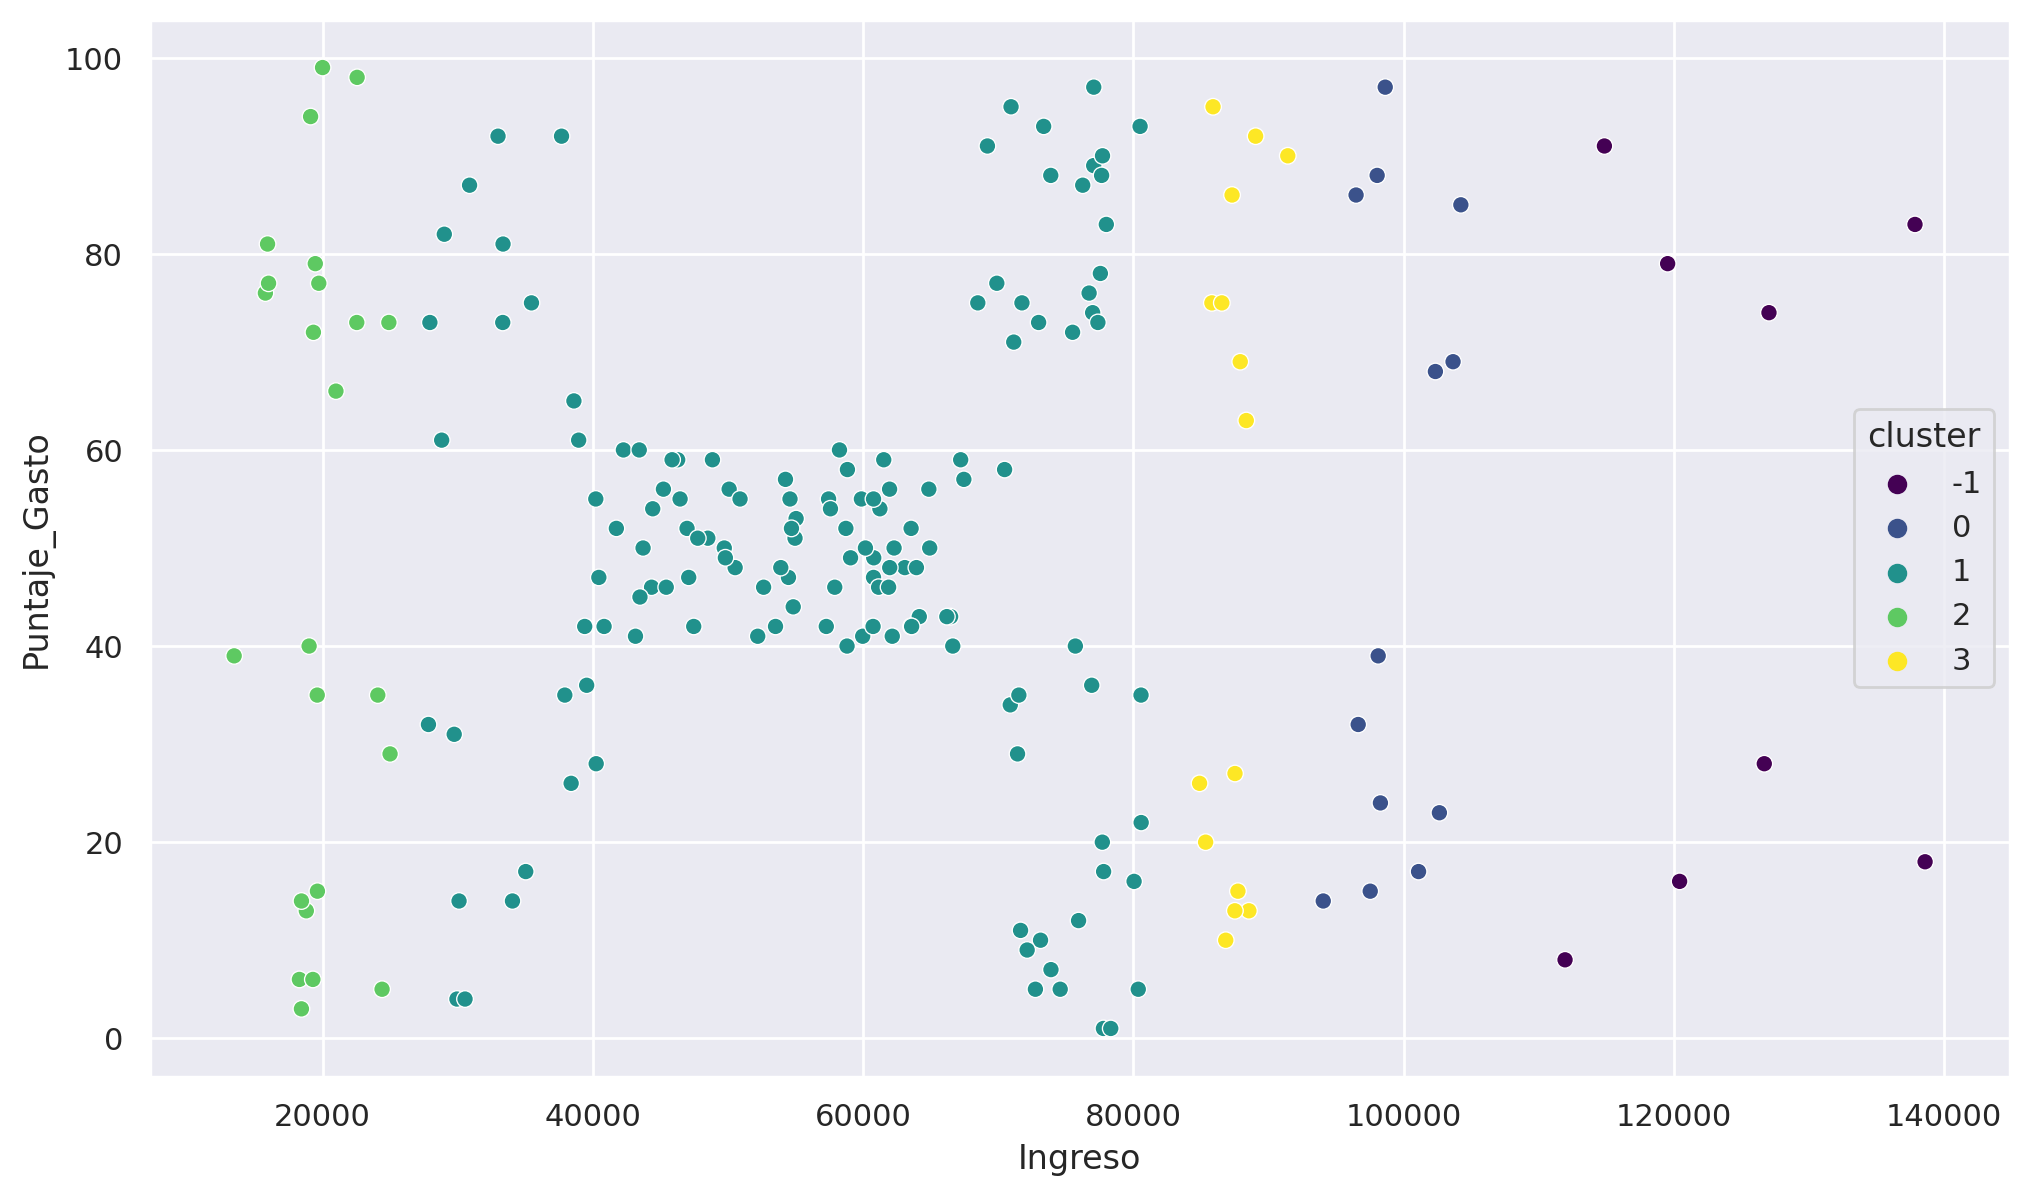

Numero de Outliers=8
Porcentaje Oultiers =4.0%


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
!pip install kneed
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')


def calcular_numero_outliers(labels):
    numero_outliers=np.sum(labels == -1)
    porc_outliers = 100 * numero_outliers / len(labels)
    return (numero_outliers,porc_outliers)

# Correr DBSCAN con los parametros por defecto  para tener una linea base
dbscan = DBSCAN()
labels= dbscan.fit_predict(df[['Ingreso', 'Puntaje_Gasto']])
df_clusterizado=df[['Ingreso', 'Puntaje_Gasto']]
df_clusterizado['cluster']= labels
plt.figure(figsize=(12,7), dpi=200)
sb.scatterplot(data=df_clusterizado, x='Ingreso', y="Puntaje_Gasto",hue='cluster', palette='viridis')
plt.show()
numero_outliers, porc_outliers= calcular_numero_outliers(dbscan.labels_)
print(f'Numero de Outliers={numero_outliers}')
print(f'Porcentaje Oultiers ={porc_outliers:.1f}%')


# SELECCIONAR EPSILON:
X=df[['Ingreso', 'Puntaje_Gasto']]
neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(X)
distancias, indices = nbrs.kneighbors(X)
distancias = np.sort(distancias.flatten())
plt.plot(distancias)
knee = KneeLocator(np.arange(len(distancias)), distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
plt.axhline(y = distancias[knee.knee], color = 'r', linestyle = '--')
plt.show()
print(distancias[knee.knee])

#DBSCAN con Epsilon=2580 y min_samples= 2* Dimension Features
dbscan = DBSCAN(eps=distancias[knee.knee], min_samples= 2*X.shape[1]) 
labels= dbscan.fit_predict(df[['Ingreso', 'Puntaje_Gasto']])
df_clusterizado=df[['Ingreso', 'Puntaje_Gasto']]
df_clusterizado['cluster']= labels
plt.figure(figsize=(10,7), dpi=200)
sb.scatterplot(data=df_clusterizado, x='Ingreso', y="Puntaje_Gasto",hue='cluster', palette='viridis')
plt.show()
numero_outliers, porc_outliers= calcular_numero_outliers(dbscan.labels_)
print(f'Numero de Outliers={numero_outliers}')
print(f'Porcentaje Oultiers ={porc_outliers:.1f}%')


#Comportamiento de Oultiers basado en variaciones de epsilon
lista_porcentaje_outliers = []
lista_numero_outliers = []
for eps in np.linspace(100,10000,500):
    dbscan = DBSCAN(eps=eps,min_samples= 2*X.shape[1])
    dbscan.fit(X)
    numero_outliers, porc_outliers= calcular_numero_outliers(dbscan.labels_)
    lista_numero_outliers.append (numero_outliers)
    lista_porcentaje_outliers.append(porc_outliers)
sb.lineplot(x=np.linspace(100,10000,500),y=lista_porcentaje_outliers)
plt.axhline(y=5,color='red',ls='--')
plt.axhline(y=1,color='red',ls='--')
plt.ylabel("Porcentaje de puntos clasificados como Oultiers")
plt.xlabel("Epsilon")
plt.show()

# SELECCIONAR MIN_SAMPLES
#Comportamiento de Oultiers basado en variaciones de min_samples
lista_porcentaje_outliers = []
lista_numero_outliers = []
for n in np.arange(1,100):
    dbscan = DBSCAN(eps=2580,min_samples=n)
    dbscan.fit(X)
    numero_outliers, porc_outliers= calcular_numero_outliers(dbscan.labels_)
    lista_numero_outliers.append (numero_outliers)
    lista_porcentaje_outliers.append(porc_outliers)
sb.lineplot(x=np.arange(1,100),y=lista_porcentaje_outliers)
plt.axhline(y=5,color='red',ls='--')
plt.axhline(y=1,color='red',ls='--')
plt.ylabel("Porcentaje de puntos clasificados como Oultiers")
plt.xlabel("min_samples")
plt.show()

# Hacemos un zoom del anterior grafico
lista_porcentaje_outliers = []
lista_numero_outliers = []
for n in np.arange(1,100):
    dbscan = DBSCAN(eps=2580,min_samples=n)
    dbscan.fit(X)
    numero_outliers, porc_outliers= calcular_numero_outliers(dbscan.labels_)
    lista_numero_outliers.append (numero_outliers)
    lista_porcentaje_outliers.append(porc_outliers)
sb.lineplot(x=np.arange(1,100),y=lista_porcentaje_outliers)
plt.axhline(y=5,color='red',ls='--')
plt.axhline(y=1,color='red',ls='--')
plt.ylim(0,10)
plt.xlim(0,10)
plt.ylabel("Porcentaje de puntos clasificados como Oultiers")
plt.xlabel("min_samples")
plt.show()

# MODELO FINAL:  EPSILON=2580 y MIN_SAMPLES=4
dbscan = DBSCAN(eps=2580,min_samples=4)
dbscan.fit(X)
numero_outliers, porc_outliers= calcular_numero_outliers(dbscan.labels_)
f_clusterizado=df[['Ingreso', 'Puntaje_Gasto']]
df_clusterizado['cluster']= labels
plt.figure(figsize=(12,7), dpi=200)
sb.scatterplot(data=df_clusterizado, x='Ingreso', y="Puntaje_Gasto",hue='cluster', palette='viridis')
plt.show()
print(f'Numero de Outliers={numero_outliers}')
print(f'Porcentaje Oultiers ={porc_outliers:.1f}%')




# Análisis
- Epsilon: La distancia máxima entre dos observaciones para que una se considere vecina de la otra. 
- Min_samples:El número de muestras  en una vecindad para que un punto se considere un punto nucleo. Esto incluye el punto en sí. 
- Distancia; la métrica usada para medir distancias.

#### <u>Procedimiento</u>

- En primer lugar se corre un modelo DBSCAN con los parámetros por defecto y como se podría esperar (dado que los datos no están estandarizados) los clasificó a todos como oultiers. Esto se debe a que epsilon es muy pequeno comparada con las magnitudes de las distancias.

| Outliers       | Valor | 
| ----------- | ----------- |
| Numero de Outliers      |  200    |
| Porcentaje de Oultiers   | 100%        |

-Después, se seleciona epsilon resultando un valor de 2580.2011. Luego se corre `DBSCAN (eps=2580.211 , min_samples= 2*Dim Features)`.Con esto se obtiene cuatro clusters y un cluster de outliers, como se puede ver  en su respectivo diagrama de dispersion. Con este epsilon y min_samples se obtiene:

| Outliers       | Valor | 
| ----------- | ----------- |
| Numero de Outliers      |  8    |
| Porcentaje de Oultiers   | 4%        |

- Luego se hace un ejericio por curiosidad para graficar % de Oultiers vs epsilon y se grafican dos lineas horizontales que representan 1% y 5% de oultiers. Esto podria ser una manera de seleccionar el epsilon al establecer que porcentaje de oultiers quiero reflejar.

- Ahora quiero confirmar por curiosidad si min_samples=2* Dim features es robusta frente a los outliers. Entonces mantengo estable epsilon con 2580.2011 y corro DBSCAN variando min_samples. Se grafica % de Outliers vs min_samples y se trazan dos lineas horizontales que representan 1% y 5% de outliers. Lo que puedo ver es que con min_samples=4 , el porcentaje de oultiers es 4%. 

- Finalmente, se corre el modelo con `DBSCAN(eps= 2580.2011, min_samples=4)`, obteniendo los siguentes clusters:

| Cluster       | Interpretación | 
| ----------- | ----------- |
| -1      |  Oultiers/Atipicos    |
| 0  | Ingresos  altos-altos    |
| 1   |Ingreso Estandar     |  
| 2   | Ingreso Bajo        |
| 3  | Ingreso altos-estandar        |

La diferencia con el anterior clustering jerarquico es que aqui el segmento de ingreso alto es particionado en dos segmentos. Esta particion fue causada por la diferencia  de densidades en esa  area de ingresos altos y DBSCAN no pudo "conectar por densidad".



### 5. Robustez

#### 5.1. Estandarización

Estandarice los datos y repita su análisis de Clustering Jerárquico y DBSCAN. ¿Cambian los resultados? Explique su respuesta

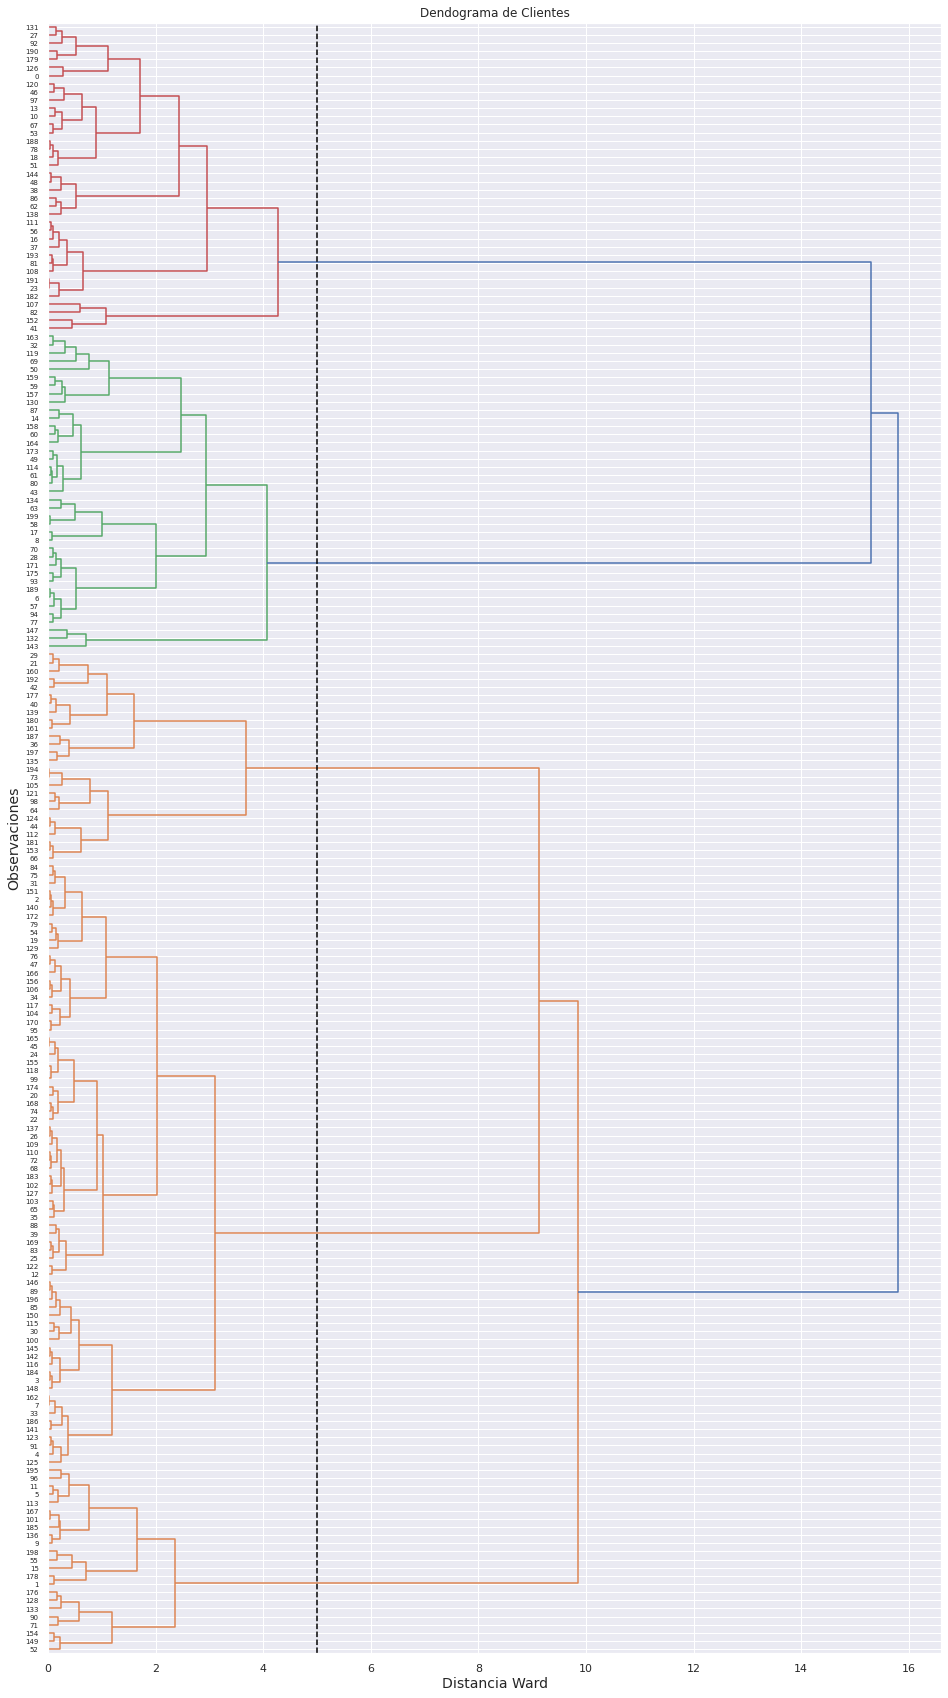

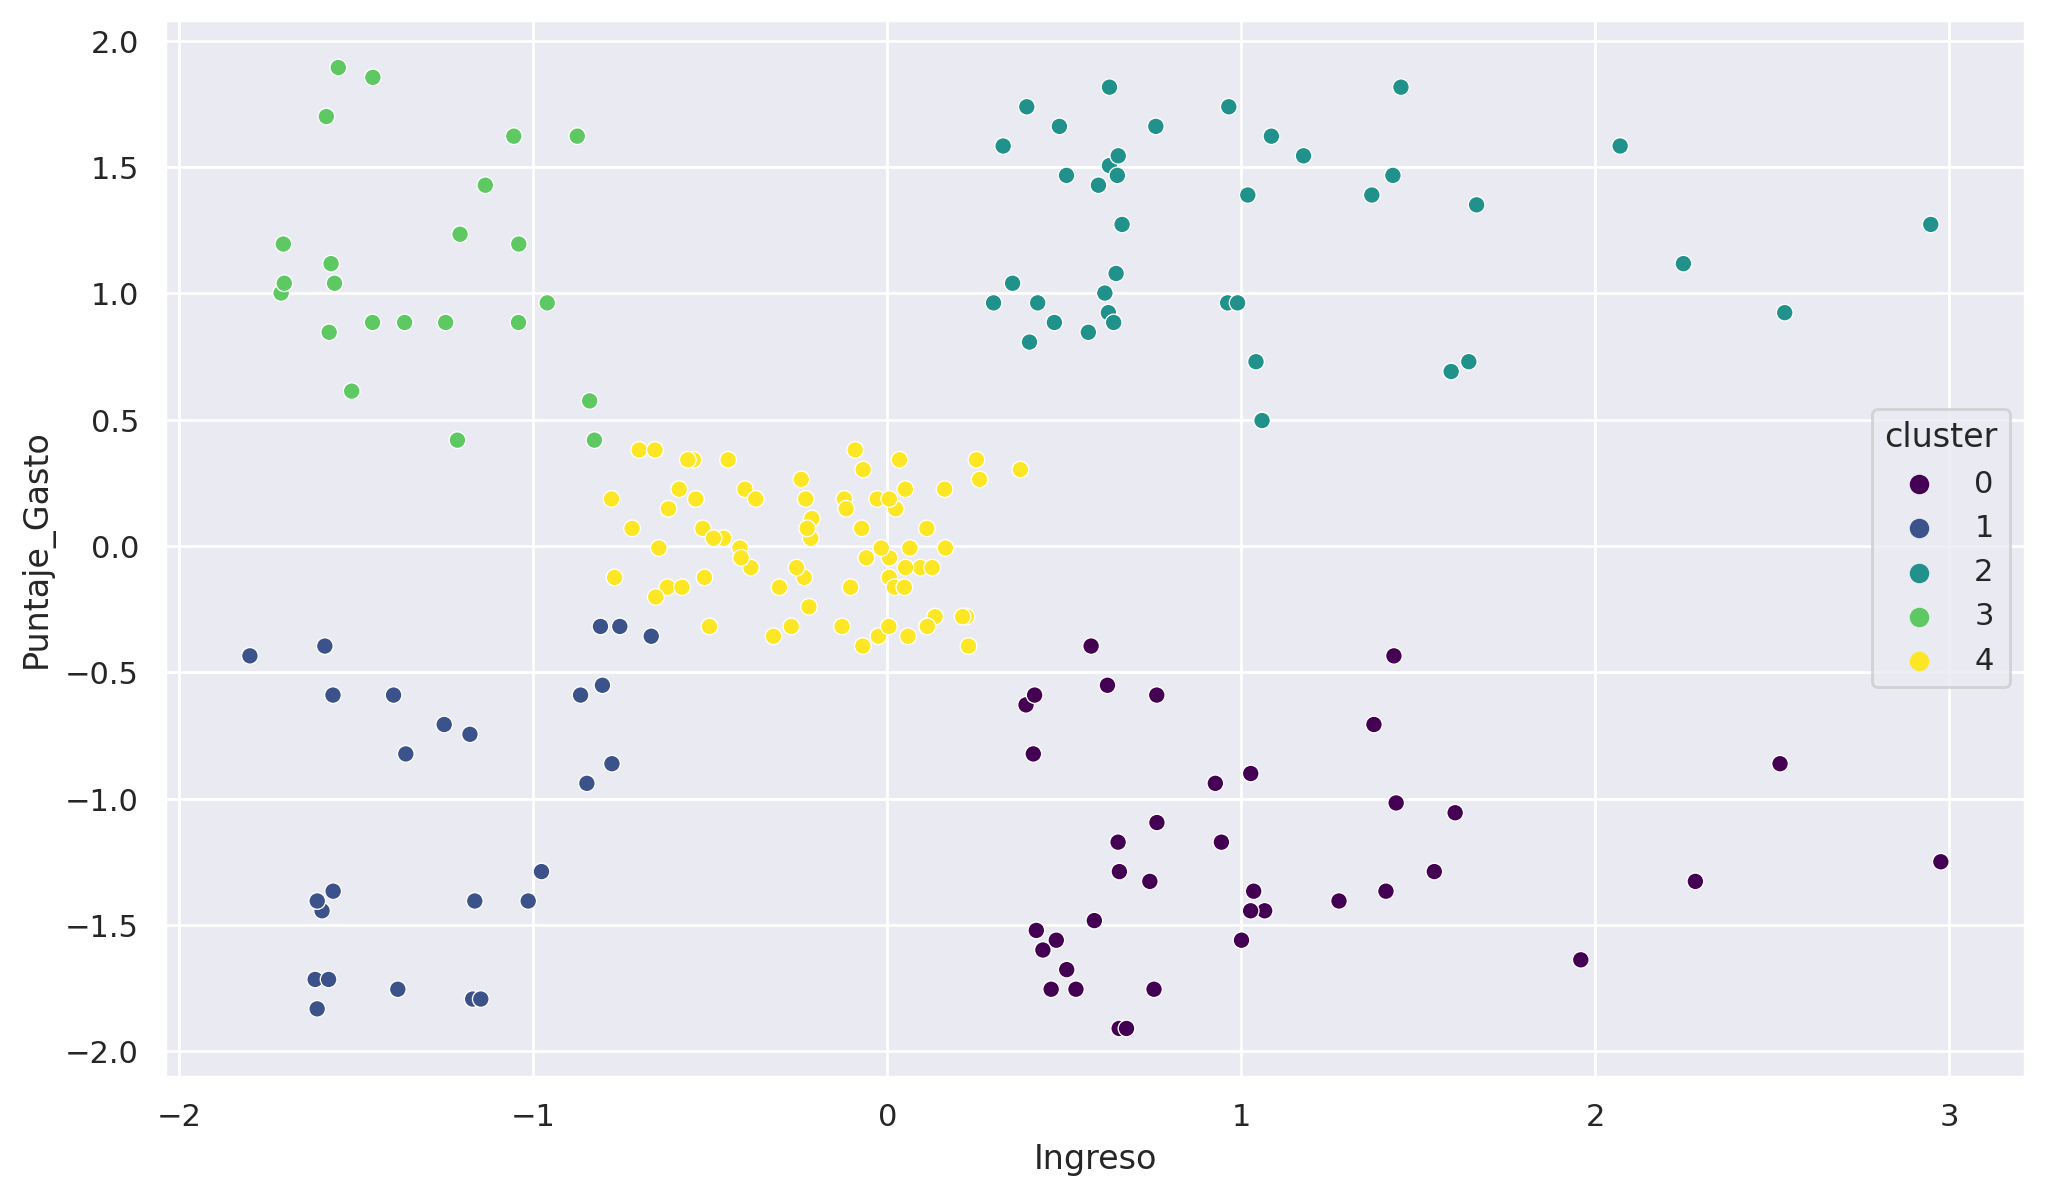

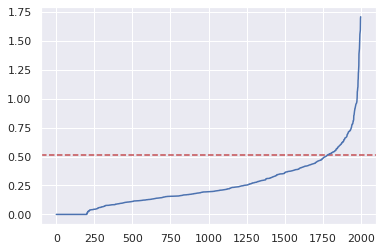

0.4934968313866966


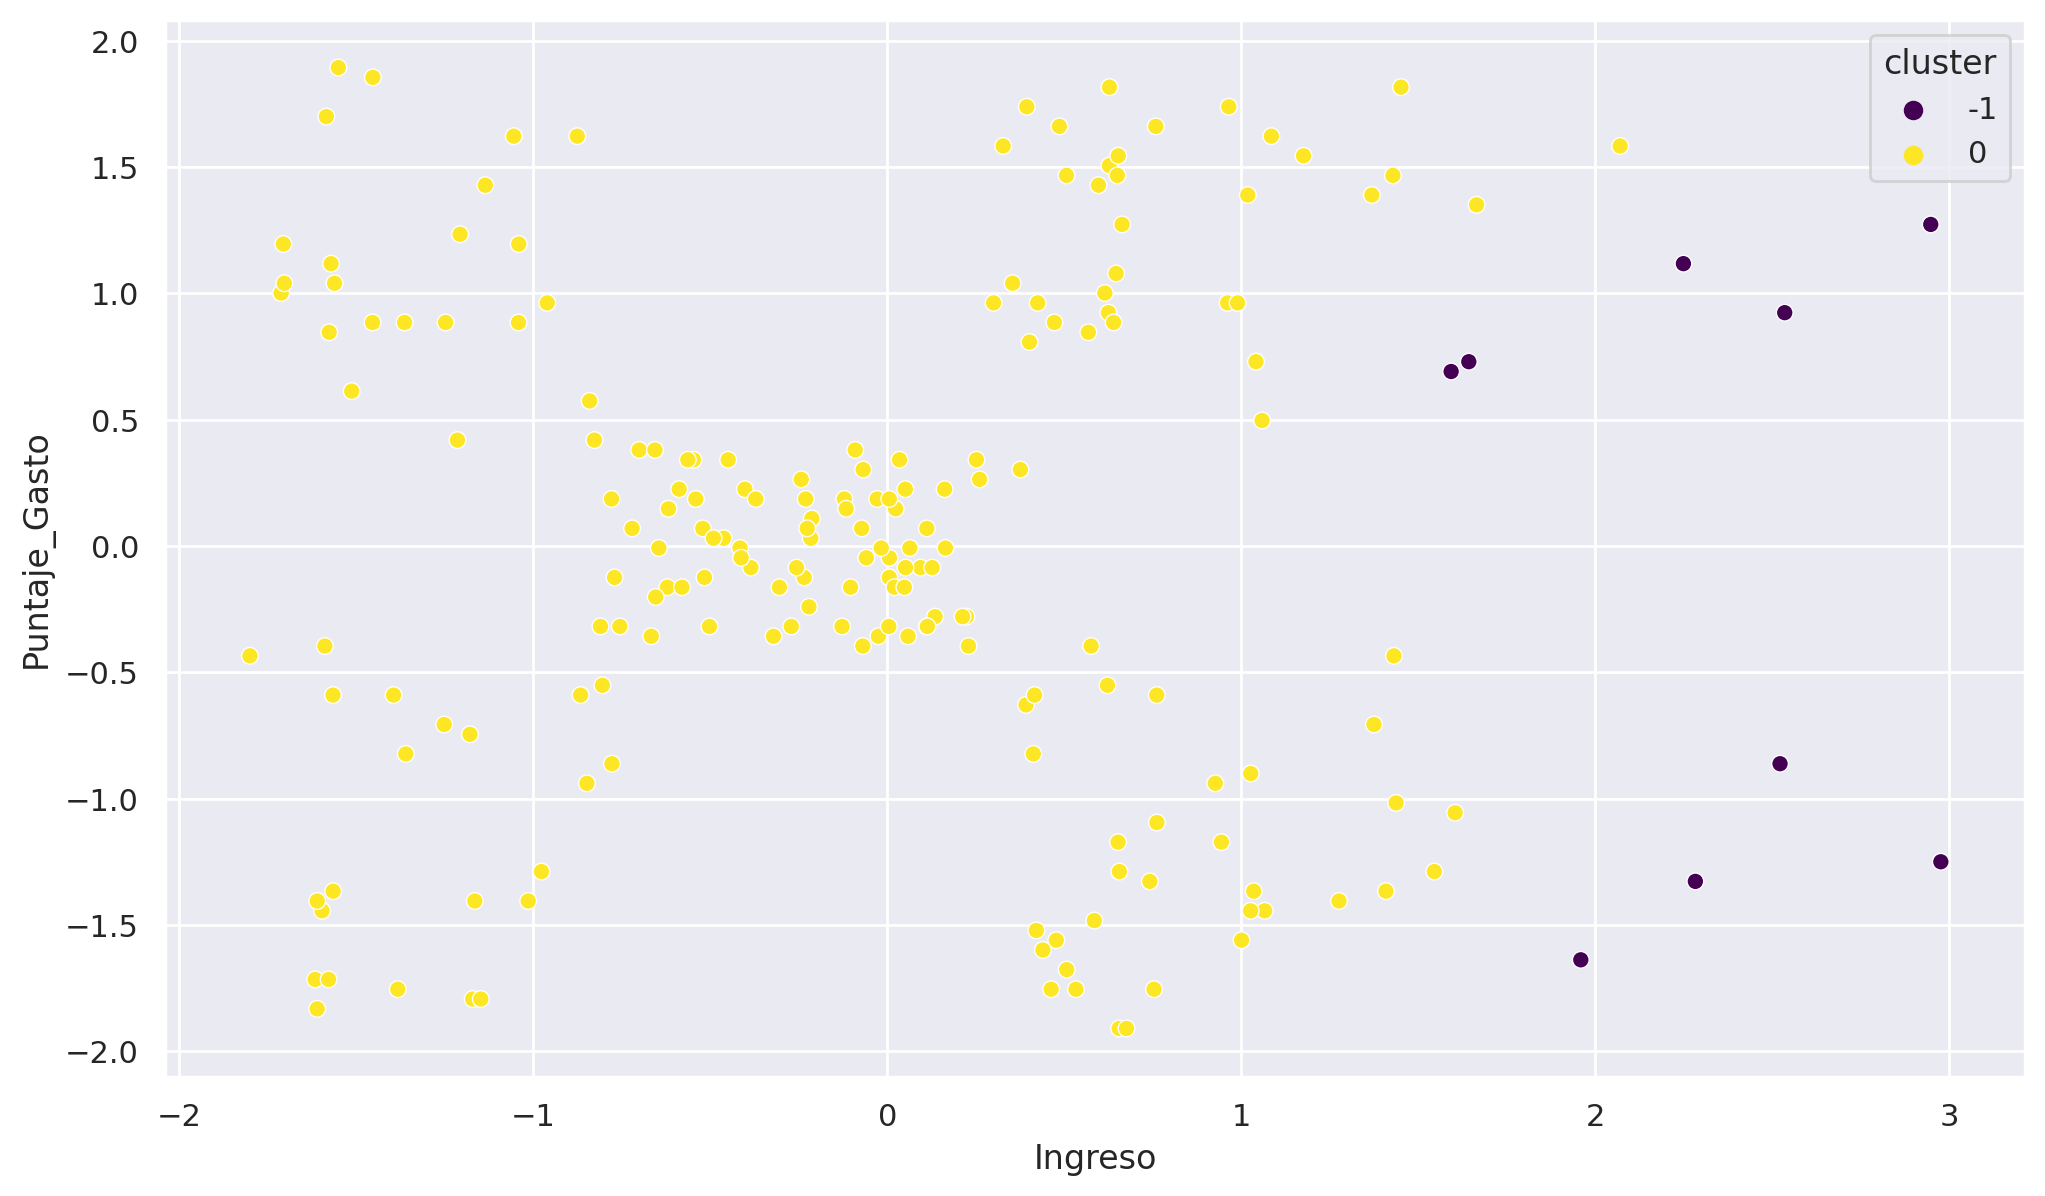

Numero de Outliers=9
Porcentaje Oultiers =4.5%


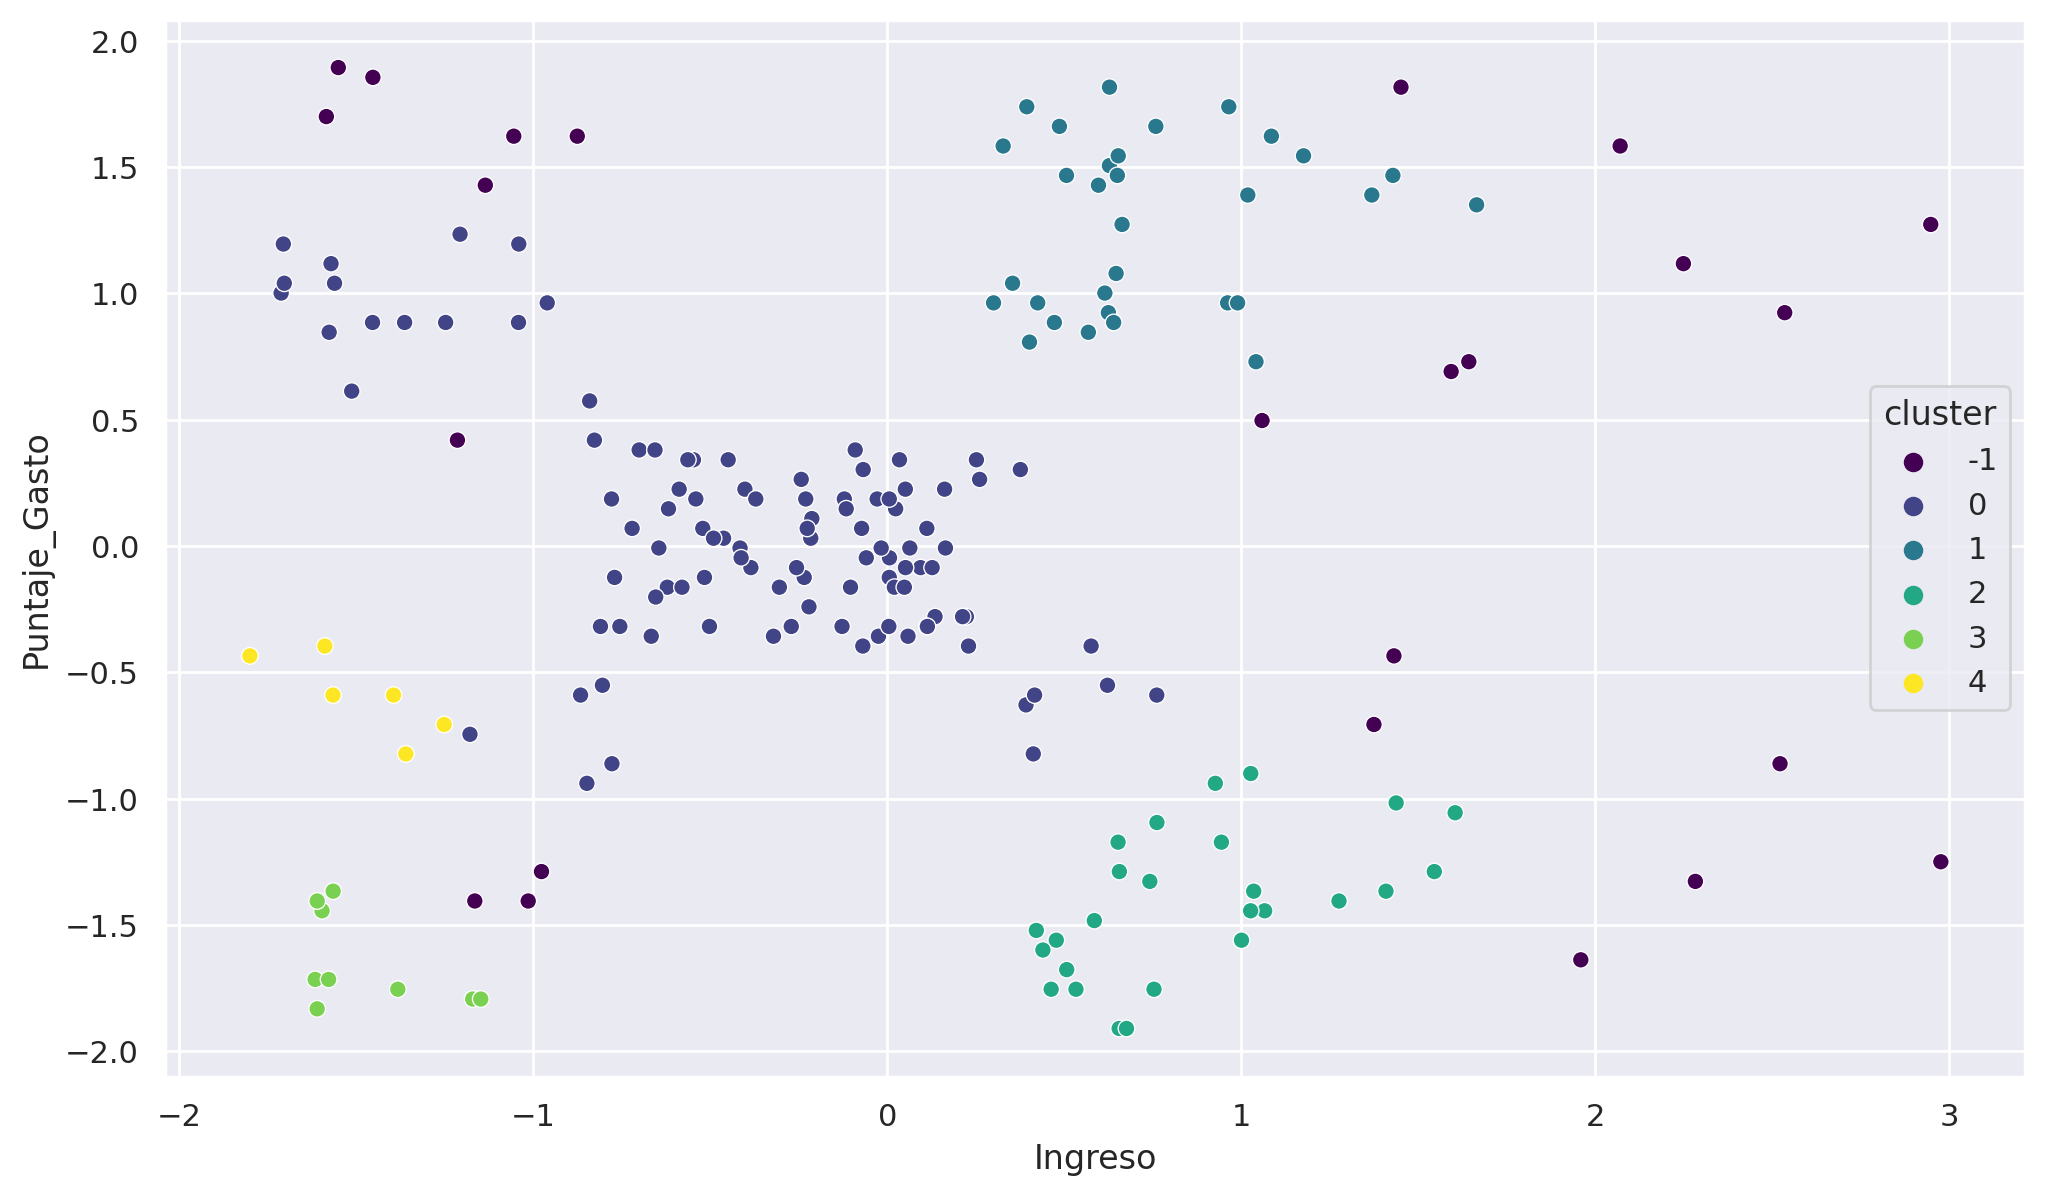

Numero de Outliers=24
Porcentaje Oultiers =12.0%


In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import AgglomerativeClustering


escalar= StandardScaler()
df_escalado= pd.DataFrame(escalar.fit_transform(df[['Ingreso', 'Puntaje_Gasto']]), columns=['Ingreso', 'Puntaje_Gasto'])

# EXPERIMENTO CON STANDARIZACION: Clustering por Jerarquias aglomerativo

dist = pdist(df_escalado,metric='euclidean')
Z = linkage(dist, method='ward')
# Plot dendograma de clientes
fig, ax = plt.subplots(figsize=(16, 30))
plt.title("Dendograma de Clientes")
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=7, orientation='right',ax=ax)
ax.set_ylabel('Observaciones', fontsize=14)
ax.set_xlabel('Distancia Ward', fontsize=14)
plt.axvline(x=5, color='black',ls='--')
plt.show()

# Clustering Aglomerativo con 5 clusters
cluster_sk = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_sk_labels =cluster_sk.fit_predict(df_escalado)
df
df_clusterizado =df_escalado[['Ingreso', 'Puntaje_Gasto']]
df_clusterizado['cluster']= cluster_sk_labels
plt.figure(figsize=(12,7), dpi=200)
sb.scatterplot(data=df_clusterizado, x='Ingreso', y="Puntaje_Gasto",hue='cluster', palette='viridis')
plt.show()



# EXPERIMENTO CON STANDARIZACION: DBSCAN
# Experimento DBSCAN con NearestNeighbors(n_neighbors = 10)
X=df_escalado[['Ingreso', 'Puntaje_Gasto']]
neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(X)
distancias, indices = nbrs.kneighbors(X)
distancias = np.sort(distancias.flatten())
plt.axhline(y = distancias[knee.knee], color = 'r', linestyle = '--')
plt.plot(distancias)
plt.show()
knee = KneeLocator(np.arange(len(distancias)), distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distancias[knee.knee])
#DBSCAN con Epsilon=0,49
dbscan = DBSCAN(eps=distancias[knee.knee], min_samples=2*X.shape[1]) 
labels= dbscan.fit_predict(X)
df_clusterizado=X
df_clusterizado['cluster']= labels
plt.figure(figsize=(12,7), dpi=200)
sb.scatterplot(data=df_clusterizado, x='Ingreso', y="Puntaje_Gasto",hue='cluster', palette='viridis')
plt.show()
numero_outliers, porc_outliers= calcular_numero_outliers(dbscan.labels_)
print(f'Numero de Outliers={numero_outliers}')
print(f'Porcentaje Oultiers ={porc_outliers:.1f}%')

# Experimento DBSCAN  con Epsilon=0.373
dbscan = DBSCAN(eps=0.373, min_samples=2*X.shape[1]) 
labels= dbscan.fit_predict(X)
df_clusterizado=X
df_clusterizado['cluster']= labels
plt.figure(figsize=(12,7), dpi=200)
sb.scatterplot(data=df_clusterizado, x='Ingreso', y="Puntaje_Gasto",hue='cluster', palette='viridis',legend='full' )
plt.show()
numero_outliers, porc_outliers= calcular_numero_outliers(dbscan.labels_)
print(f'Numero de Outliers={numero_outliers}')
print(f'Porcentaje Oultiers ={porc_outliers:.1f}%')





# Análisis
Para estos experimentos, se estandarizán primero los datos de Ingreso y Score de Gastos.

### <u>Experimento 1:</u>

- Para el cluster jerarquico aglomerativo se genera la matrix de distancias usando métrica euclidiana y el método de enlace "ward" , y luego se procede a dibujar el dendograma. 
- El siguiente paso es determinar la distancia de corte para la retención de clusters. Como yo ya tenía a una idea a priori, y habia experimentado con un modelo base, tome la distancia de corte de 5 porque una distancia menor a  esa, se retendrían   muchos cluster(quizas con un nivel de granularidad exagerado); y con una distancia mayor , habría un merge en la jeraquía superior con una distancia mayor que implica una  mayor dismiliaridad. Al hacer el corte en la dstancia= 5 se retienen 5 clusters. En terminos generales, si se cortara el dendrograma más arriba, entonces habría menos clusters  finales, pero su nivel de similitud sería menor. Si se cortara el dendrograma más abajo, entonces el nivel de similitud sería mayor, pero habría más clusteres finales.

- La interpretación de estos 5 clusters son:

| Cluster       | Interpretación | Segmento de Cliente
| ----------- | ----------- |---------- |
| 0      |  Ingreso  Alto con bajo score de gasto    |De observacion    |
| 1   | Ingreso Bajo con bajo score de gasto        |No importante   |
| 2   |Ingreso bajo con bajo score de gasto      |  **Target** |
| 3   | Ingreso Bajo  con alto score de gasto      |No importante      |
| 4   | Ingreso estandar y gasto estandar     |Estandar       |
 
 Esta clusterización involucra el score de gastos y personalmente, me parece que brinda clusteres con mejor  información. Ahora me gustaría tener esta misma clusterizacion pero resaltando los outliers, porque se que ellos existen y dado que DBSCAN es propicio para la deteccion de oultiers, entonces se procederá a experimentar con DBSCAN.

 ### <u>Experimento 2</u>

#### Experimento DBSCAN con eps= 0.4934
 - Se selecciona epsilon  dando como resultado= 0.4934. Con este epsilón y min_samples=4 se obtienen los siguientes resultados:


 | Outliers       | Valor | 
| ----------- | ----------- |
| Numero de Outliers      |  9    |
| Porcentaje de Oultiers   | 4.5%        |

Con esta configuración de `DBSCAN(eps=0.4934 , min_samples=4)`, se revelan 2 clusters y uno de ellos es el cluster de outliers. Aqui es donde se refleja la falta de robustez al estandarizar los datos. Se convierte en un problema distinto.

#### Experimento DBSCAN con eps= 0.373

Se  experimenta con un epsilon-0.373 para obtener otra topologia de cluster y el resultado es:

 | Outliers       | Valor | 
| ----------- | ----------- |
| Numero de Outliers      |  24    |
| Porcentaje de Outliers   | 12%        |


| Cluster       | Interpretación | 
| ----------- | ----------- |
| -1      | Outliers    |   
| 0      | Ingreso Estandar con gasto estandar a alto    |
| 1   | Ingreso alto con alto score de gasto       |
| 2   |Ingreso alto con bajo score de gasto    | 
| 3   | Ingreso Bajo  con bajo score de gasto      |
| 4   | Ingreso estandar con gasto estandar  a bajo   |Estandar       |
 
 ### Conclusion:

El hecho que se estandarizan los features, cambia la magnitud de ellas y esto repercute en la medida de distancia y por ende repercute en los resultados de la clusterización. 

#### 5.2. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Discuta como puede incorporar estas variables a su análisis, sientase libre de elegir el camino que usted considere correcto. Una vez que haya elegido un camino, realice nuevamente el análisis de segmentación usando sólo DBSCAN. Grafique sus resultados, e interprete los clusters que encontró. ¿Incorporar estas variables restantes, en su opinión, ayuda a la focalización de la estrategia de marketing?

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4232 sha256=d2549cfb47d857c1c993bb2afb7bc285d18b01b6ae923a4e4fe80337946570ff
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


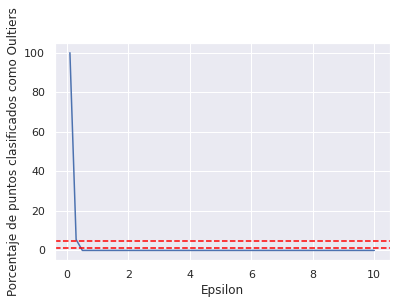

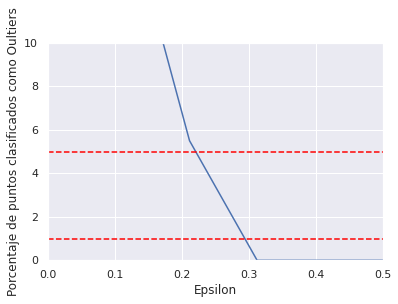

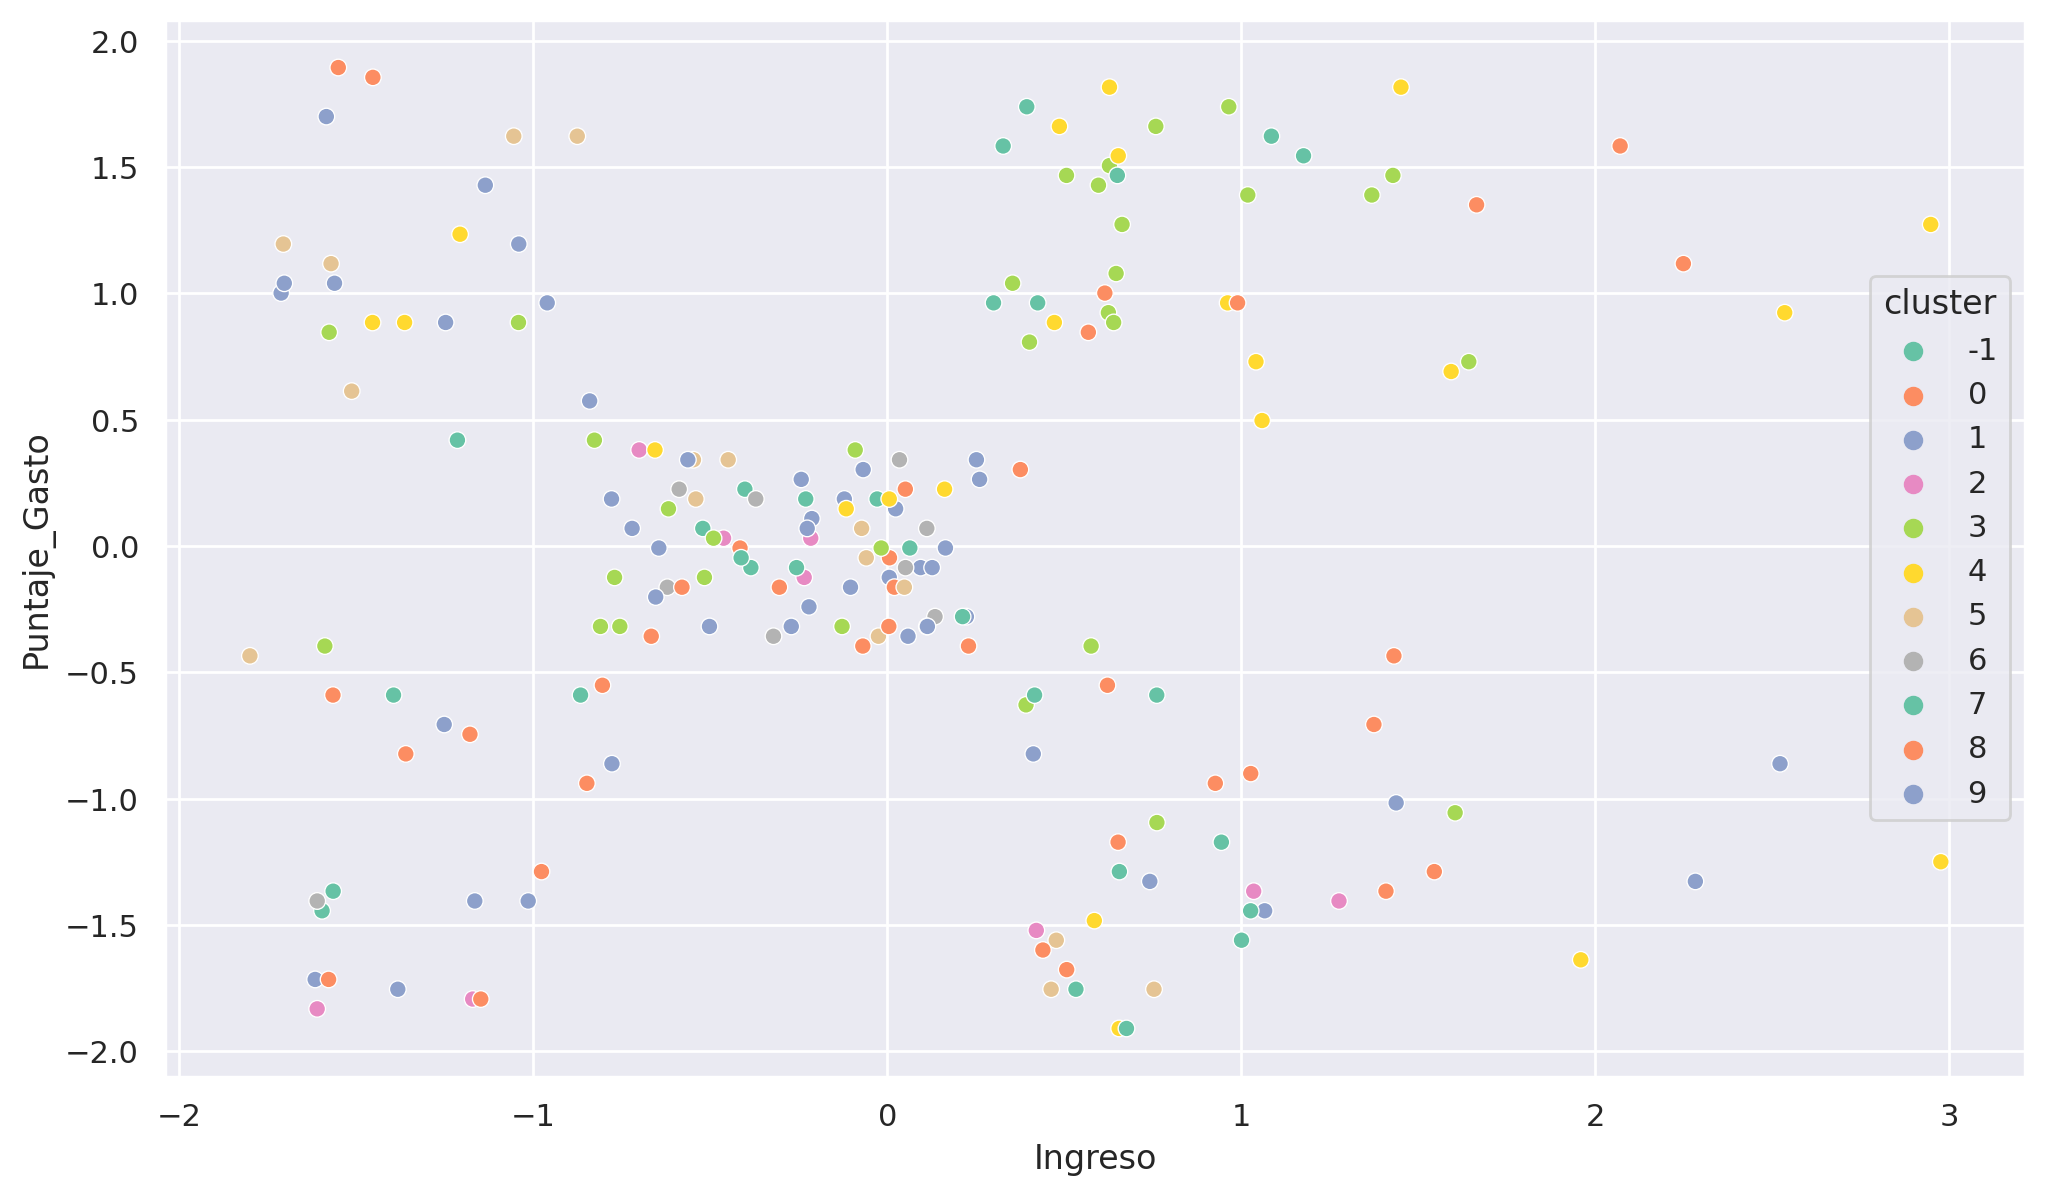

Numero de Outliers=11
Porcentaje Oultiers =5.5%


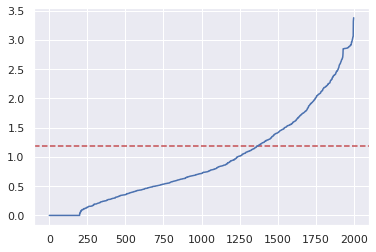

1.1806789988377244


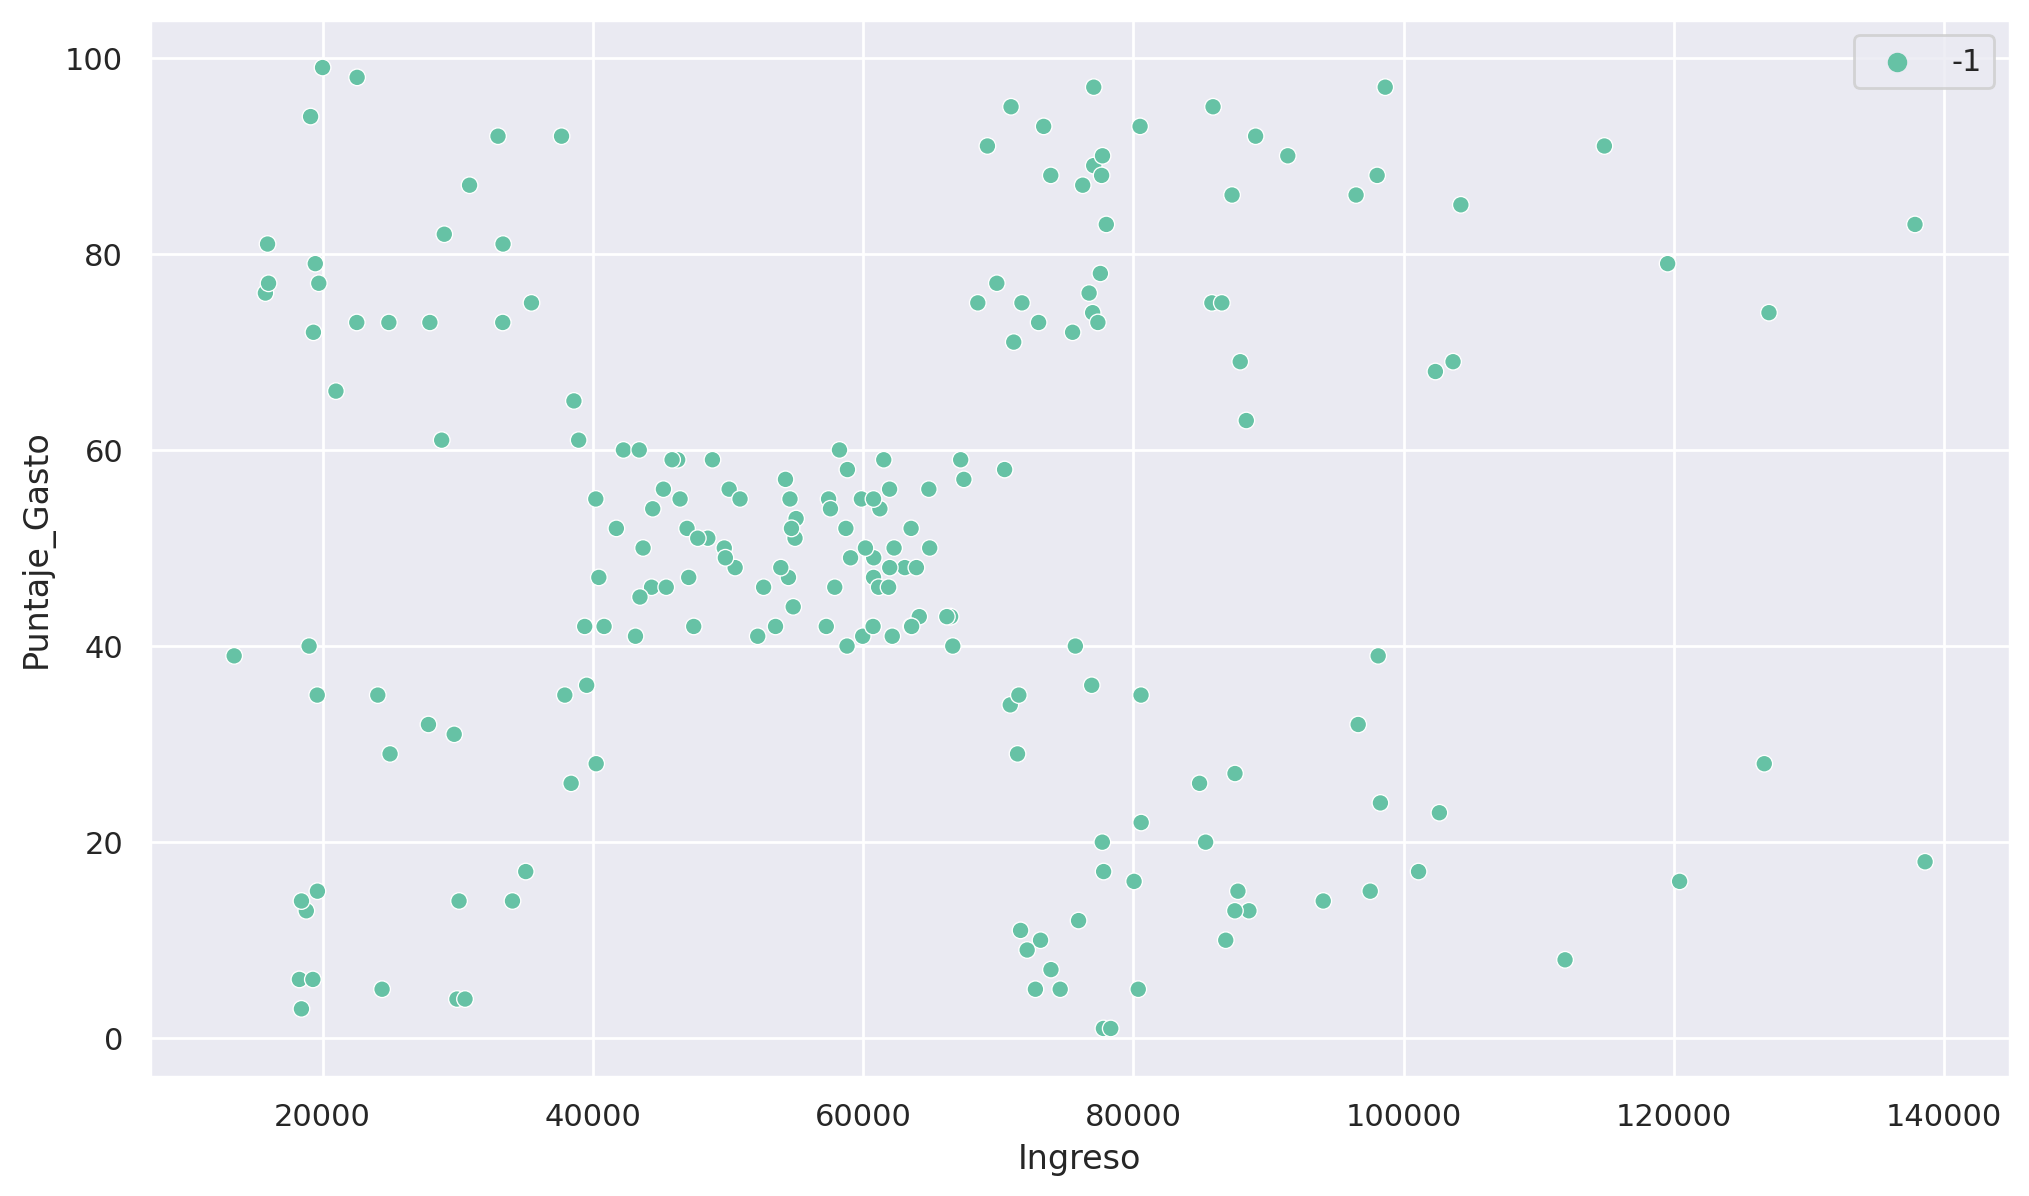

Numero de Outliers=200
Porcentaje Oultiers =100.0%


In [ ]:
!pip install gower
import gower
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#EXPERIMENT0  1:
# Estandarizacion: Se estandarizan las features continuas y se dejan las categoricas Genero 
# y GrupoEdad sin hacer encoding   porque usare Gower para calcular la distancia
escalar= StandardScaler()
df_escalado= pd.DataFrame(escalar.fit_transform(df[['Ingreso', 'Puntaje_Gasto']]), columns=['Ingreso', 'Puntaje_Gasto'])
df_escalado.set_index(df.index, inplace=True) 
df_escalado = pd.concat([df[['Genero','GrupoEdad']], df_escalado], axis=1, join="inner")

#Calcular matrix_distancias con Gower para usar esta matrix directamente en DBSCAN
dist_matrix = gower.gower_matrix(df_escalado)


#Comportamiento de Oultiers basado en variaciones de epsilon
lista_porcentaje_outliers = []
lista_numero_outliers = []
for eps in np.linspace(0.01,10,50):
    dbscan = DBSCAN(eps = eps, min_samples = 2*df_escalado.shape[1], metric = "precomputed").fit(dist_matrix)
    numero_outliers, porc_outliers= calcular_numero_outliers(dbscan.labels_)
    lista_numero_outliers.append (numero_outliers)
    lista_porcentaje_outliers.append(porc_outliers)
sb.lineplot(x=np.linspace(0.1,10,50),y=lista_porcentaje_outliers)
plt.axhline(y=5,color='red',ls='--')
plt.axhline(y=1,color='red',ls='--')
plt.ylabel("Porcentaje de puntos clasificados como Oultiers")
plt.xlabel("Epsilon")
plt.show()


#Este el msmo grafico anteriorpero haciendo ZOOM a 1% y 5% de outliers
lista_porcentaje_outliers = []
lista_numero_outliers = []
for eps in np.linspace(0.01,10,100):
    dbscan = DBSCAN(eps = eps, min_samples = 2*df_escalado.shape[1], metric = "precomputed").fit(dist_matrix)
    numero_outliers, porc_outliers= calcular_numero_outliers(dbscan.labels_)
    lista_numero_outliers.append (numero_outliers)
    lista_porcentaje_outliers.append(porc_outliers)
sb.lineplot(x=np.linspace(0.01,10,100),y=lista_porcentaje_outliers)
plt.axhline(y=5,color='red',ls='--')
plt.axhline(y=1,color='red',ls='--')
plt.ylabel("Porcentaje de puntos clasificados como Oultiers")
plt.xlabel("Epsilon")
plt.ylim(0,10)
plt.xlim(0,0.5)
plt.show()

# Usando DBSCAN eps=0.25 y min_samples=8
dbscan = DBSCAN(eps = 0.25, min_samples = 2*df_escalado.shape[1], metric = "precomputed").fit(dist_matrix)
labels = dbscan.labels_
df_clusterizado =df_escalado.copy()
df_clusterizado['cluster']= labels
plt.figure(figsize=(12,7), dpi=200)
ax=sb.scatterplot(data=df_clusterizado, x='Ingreso', y="Puntaje_Gasto",hue='cluster', legend='full',palette='Set2')
plt.show()
numero_outliers, porc_outliers= calcular_numero_outliers(dbscan.labels_)
print(f'Numero de Outliers={numero_outliers}')
print(f'Porcentaje Oultiers ={porc_outliers:.1f}%')

# Ver la topologia del cluster
df_clusterizado[df_clusterizado['cluster']==-1]
df_clusterizado[df_clusterizado['cluster']== 0]
df_clusterizado[df_clusterizado['cluster']== 1]
df_clusterizado[df_clusterizado['cluster']== 2]
df_clusterizado[df_clusterizado['cluster']== 3]
df_clusterizado[df_clusterizado['cluster']== 4]
df_clusterizado[df_clusterizado['cluster']== 5]
df_clusterizado[df_clusterizado['cluster']== 6]
df_clusterizado[df_clusterizado['cluster']== 7]
df_clusterizado[df_clusterizado['cluster']== 8]
df_clusterizado[df_clusterizado['cluster']== 9]


# EXPERIMENTO 2: POr curiosidad, Convertir variables a dummies, escalar y aplicar DBSCAN

# Encoding
df_variables_dummies= pd.get_dummies(df.drop('Edad', axis=1))
escalar= StandardScaler()
# Escalado
X_escalado=escalar.fit_transform(df_variables_dummies)

neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(X_escalado)
distancias, indices = nbrs.kneighbors(X_escalado)
distancias = np.sort(distancias.flatten())
plt.axhline(y = distancias[knee.knee], color = 'r', linestyle = '--')
plt.plot(distancias)
plt.show()
knee = KneeLocator(np.arange(len(distancias)), distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distancias[knee.knee])
# Usando DBSCAN eps=1.18 y min_samples=8
dbscan = DBSCAN(eps = distancias[knee.knee], min_samples = 2*X_escalado.shape[1])
labels= dbscan.fit_predict(X_escalado)
df_clusterizado = pd.DataFrame(X_escalado)
df_clusterizado['cluster']= labels
plt.figure(figsize=(12,7), dpi=200)
ax=sb.scatterplot(data=df_variables_dummies, x='Ingreso', y="Puntaje_Gasto",hue=labels, legend='full',palette='Set2')
plt.show()
numero_outliers, porc_outliers= calcular_numero_outliers(dbscan.labels_)
print(f'Numero de Outliers={numero_outliers}')
print(f'Porcentaje Oultiers ={porc_outliers:.1f}%')






## Análisis

### Experimento 1: Usando Gower para la matrix dstancias con categóricas

- Estandarización: Se estandarizan las features continuas [Ingreso, Puntaje_gasto] solamente  y  las categoricas [Genero, GrupoEdad] no se transforman porque se usará Gower para la calcular matrix de distancias. Por qué Gower? Porque permite incorporar variables categóricas en el calculo de la matriz d distancias.
- Se corre el modelo con DBSCAN usando la matrix de distancias precalculada con Gower de la siguiente forma:</br>
`DBSCAN(eps = 0.25, min_samples = 2*df_escalado.shape[1], metric = "precomputed").fit(dist_matrix)` </br>
donde `dist_matrix = gower.gower_matrix(df_escalado)`
- También, se corre el modelo con varios epsilón para ver el comportamiento de los outliers vs epsilón.  Selecciono epsilon= 0.25 que produce 5.5% de outliers (11 outliers).

- Con este epsilón =- 0.25 se generan los siguientes clusters:

| Cluster       |  Segmento de Cliente|
| ----------- |---------- |
| -1    |Mujeres entre 55-64+  (Outliers)  |
| 0   | Mujeres entre 35-44  |
| 1   |     Mujeres entre 18-24 |
|2   | Hombres entre 55-64    |
| 3   |Mujer entre 25-34     |
| 4   | Hombres entre 25-34     |
|5   | Hombres entre 18-24     |
|6   | Hombres 65+     |
|7   | Hombres 35-44     |
|8   | Hombres 45-54    |
|9   | Hombres 45-54    |


- La topología del cluster viene dada por genero y grupo de edad principalmente. Sin embargo, las variables Ingreso y Score de Gasto tuvieron poca o ninguna relevancia. Es por esto que esta cluerizacion no me seria util para una estratega de marketing para mejorar la venta  de un producto.


### Experimento 2: Por curiosidad, este experimento convierte variables catgoricas a dummies, luego estandariza para posteriormente aplicar `DBSCAN(eps = distancias[knee.knee], min_samples = 2*X_escalado.shape[1])`


- En este experimento se obtiene  que todos los puntos son outliers y esto significa que epsilón está muy pequeño y se debe incrementar para empezar a revelar clusters.

- Aquí tambien se refleja la falta de robustez cuando se aplica alguna métrica distinta a la euclidiana, en donde los resultados son muy diferentes.